## Load data

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import sys
sys.path.append('../')
import conf #This is the local config file for setting the supplements directory to your local environment

odir = conf.SUPPLEMENTS_DIR+'Benchmarking (Fig3-4)/'

#load Y meta data
y_meta = pd.read_csv('meta_y.tsv', sep = '\t')
#expand meta so that each row corresponds to a single kinase condition
y_meta['Kinases'] = y_meta['Kinases'].apply(lambda x: x.split(','))
y_meta = y_meta.explode('Kinases')
y_meta.rename({'Unnamed: 0': 'Dataset'}, axis = 1, inplace = True)
y_meta = y_meta.drop_duplicates()
y_meta.reset_index(inplace = True)
#load st meta data
st_meta = pd.read_csv('meta_st.tsv', sep = '\t')
#expand meta so that each row corresponds to a single kinase condition
st_meta['Kinases'] = st_meta['Kinases'].apply(lambda x: str(x).split(','))
st_meta = st_meta.explode('Kinases')
st_meta.rename({'Unnamed: 0': 'Dataset'}, axis = 1, inplace = True)
st_meta = st_meta.drop_duplicates()
st_meta.reset_index(inplace = True)
meta = {'Y':y_meta,'ST':st_meta}

PSP = pd.read_csv(odir + '/psp_mapped_Nov2021.tsv', sep = '\t', index_col = 0)

## Calculating Phit

In [19]:
pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KSTAR/kstar_benchmark_Y_mann_whitney_activities.tsv', sep ='\t')

,KSTAR_KINASE,data:Bosutinib_Giansanti,data:Dasatinib_50nm_Pan,data:Dasatinib_5nm_Pan,data:Dasatinib_Asmussen,data:Dasatinib_Giansanti,data:Imatinib_Giansanti,data:Nilotinib_Giansanti,data:EGF_10min_WY2006,data:EGF_16min_WY2007,...,data:EGF_stimulation1_Pan,data:EGF_stimulation2_Pan,data:HRG_10min_WY2006,data:TCRstimulation_15sec_Chylek,data:TCRstimulation_30sec_Chylek,data:TCRstimulation_5sec_Chylek,data:TCRstimulation_60sec_Chylek,data:VEGF_10min_Zhuang,data:VEGF_20min_Zhuang,data:VEGF_30min_Zhuang
0,ABL1,9.999993e-01,1.193317e-01,1.989634e-01,3.137820e-14,9.516115e-01,3.140004e-01,9.999995e-01,1.502694e-07,1.368403e-04,...,0.999988,0.999993,1.517531e-07,1.051726e-01,2.385732e-01,8.598875e-03,3.213333e-01,8.420842e-15,8.408048e-15,2.542896e-15
1,ABL2,9.972293e-01,9.961053e-01,9.977169e-01,6.747203e-26,1.000000e+00,9.998146e-01,9.960849e-01,8.563103e-01,9.998444e-01,...,1.000000,1.000000,6.010027e-01,9.912981e-01,9.995392e-01,8.794792e-01,9.999389e-01,2.170138e-02,9.069686e-03,1.195264e-02
2,BLK,9.485291e-01,9.999958e-01,9.999386e-01,2.984093e-08,1.267803e-02,6.706992e-01,9.251324e-01,6.543606e-06,2.650505e-13,...,0.999972,0.999984,1.318744e-06,6.062660e-17,2.787269e-22,5.003830e-21,4.041196e-23,1.231226e-02,2.720869e-02,2.131488e-02
3,BMX,9.962787e-01,9.999963e-01,9.999923e-01,2.660696e-04,2.730647e-01,2.259555e-01,9.973870e-01,7.436540e-01,9.964989e-01,...,1.000000,1.000000,7.211355e-01,9.151541e-02,2.181290e-02,7.810114e-04,8.896578e-04,3.698820e-15,1.394295e-14,3.384290e-16
4,BTK,1.000000e+00,9.994577e-01,9.999310e-01,5.796480e-29,1.000000e+00,5.399318e-01,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000e+00,6.302653e-23,3.898978e-34,4.545487e-34,2.484953e-34,1.000000e+00,1.000000e+00,1.000000e+00
5,CSF1R,1.000000e+00,2.148943e-10,7.408437e-22,1.725677e-21,1.000000e+00,9.815241e-01,1.000000e+00,2.574615e-15,1.552922e-23,...,1.000000,1.000000,1.029722e-17,1.000000e+00,8.378135e-01,1.000000e+00,9.999712e-01,6.249208e-01,5.259410e-01,5.382289e-01
6,EGFR,4.553863e-27,9.629621e-01,9.211545e-01,1.269400e-02,3.296414e-29,1.132918e-25,4.199887e-28,9.540050e-18,2.306898e-33,...,0.999313,0.996956,5.824169e-17,1.562982e-03,2.046430e-01,5.165581e-04,1.445083e-01,9.119873e-29,8.296304e-29,1.099852e-29
7,EPHA1,7.251171e-01,9.999997e-01,9.999974e-01,6.539359e-07,9.084103e-04,9.982077e-01,7.094595e-01,3.851394e-06,4.583423e-14,...,1.000000,1.000000,3.500072e-03,6.944569e-01,1.410998e-01,1.393938e-02,7.121683e-02,7.409072e-09,3.046761e-09,2.967865e-08
8,EPHA2,2.925876e-16,1.000000e+00,9.999999e-01,1.406813e-02,3.547179e-19,3.339821e-10,1.111993e-16,3.749523e-31,1.110210e-28,...,1.000000,1.000000,1.619432e-31,2.604363e-03,7.000723e-01,3.323863e-03,1.784040e-01,1.844378e-30,7.954474e-31,3.627327e-30
9,EPHA3,9.988201e-01,9.999998e-01,9.999999e-01,1.446557e-04,1.286882e-01,6.670581e-01,9.431768e-01,2.439696e-03,9.060149e-03,...,1.000000,1.000000,6.924857e-02,4.102534e-01,6.435455e-01,5.521251e-03,1.493954e-01,8.014837e-13,5.532994e-13,9.875814e-13


In [18]:
algorithm_results_rank['KSTAR']['Y']

,data:Bosutinib_Giansanti,data:Dasatinib_50nm_Pan,data:Dasatinib_5nm_Pan,data:Dasatinib_Asmussen,data:Dasatinib_Giansanti,data:Imatinib_Giansanti,data:Nilotinib_Giansanti,data:EGF_10min_WY2006,data:EGF_16min_WY2007,data:EGF_1min_WY2007,...,data:EGF_stimulation1_Pan,data:EGF_stimulation2_Pan,data:HRG_10min_WY2006,data:TCRstimulation_15sec_Chylek,data:TCRstimulation_30sec_Chylek,data:TCRstimulation_5sec_Chylek,data:TCRstimulation_60sec_Chylek,data:VEGF_10min_Zhuang,data:VEGF_20min_Zhuang,data:VEGF_30min_Zhuang
KSTAR_KINASE,,,,,,,,,,,,,,,,,,,,,
ABL1,3.074462e-07,9.232441e-01,7.012269e-01,1.350337e+01,2.154033e-02,0.503070,2.136832e-07,6.823129e+00,3.863786e+00,6.245538e+00,...,5.206754e-06,2.954033e-06,6.818862e+00,9.780972e-01,6.223784e-01,2.065558e+00,4.930442e-01,1.407464e+01,1.407530e+01,1.459467e+01
ABL2,1.204968e-03,1.694768e-03,9.926756e-04,2.517088e+01,4.755121e-09,0.000081,1.703638e-03,6.736882e-02,6.756097e-05,9.692681e-04,...,8.432324e-09,9.049564e-09,2.211236e-01,3.795709e-03,2.001732e-04,5.577440e-02,2.653451e-05,1.663513e+00,2.042408e+00,1.922536e+00
BLK,2.294935e-02,1.837893e-06,2.666128e-05,7.525188e+00,1.896948e+00,0.173472,3.379609e-02,5.184183e+00,1.257667e+01,1.248163e+01,...,1.229280e-05,6.751166e-06,5.879840e+00,1.621734e+01,2.155482e+01,2.030070e+01,2.239349e+01,1.909662e+00,1.565292e+00,1.671317e+00
BMX,1.619141e-03,1.593618e-06,3.335564e-06,3.575005e+00,5.637344e-01,0.645977,1.136302e-03,1.286291e-01,1.523175e-03,1.659469e-02,...,1.265931e-08,5.452499e-09,1.419831e-01,1.038506e+00,1.661287e+00,3.107343e+00,3.050777e+00,1.443194e+01,1.385565e+01,1.547053e+01
BTK,-0.000000e+00,2.355858e-04,2.995157e-05,2.823684e+01,-0.000000e+00,0.267661,-0.000000e+00,-0.000000e+00,6.748846e-13,5.821163e-13,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,2.220048e+01,3.340905e+01,3.334242e+01,3.360468e+01,1.661941e-10,1.822579e-14,1.263761e-10
CSF1R,4.532339e-15,9.667775e+00,2.113027e+01,2.076304e+01,-0.000000e+00,0.008099,7.473538e-15,1.458929e+01,2.280885e+01,2.078852e+01,...,2.684688e-13,9.808368e-12,1.698728e+01,-0.000000e+00,7.685264e-02,2.078671e-11,1.252408e-05,2.041750e-01,2.790630e-01,2.690330e-01
EGFR,2.634162e+01,1.639081e-02,3.566754e-02,1.896401e+00,2.848196e+01,24.945801,2.737676e+01,1.702045e+01,3.263697e+01,3.218872e+01,...,2.984729e-04,1.323843e-03,1.623477e+01,2.806046e+00,6.890030e-01,3.286881e+00,8.401071e-01,2.804001e+01,2.808112e+01,2.895867e+01
EPHA1,1.395918e-01,1.433815e-07,1.120917e-06,6.184465e+00,3.041718e+00,0.000779,1.490724e-01,5.414382e+00,1.333881e+01,1.342466e+01,...,4.163243e-12,4.050658e-12,2.455923e+00,1.583547e-01,8.504736e-01,1.855757e+00,1.147417e+00,8.130236e+00,8.516162e+00,7.527556e+00
EPHA2,1.553374e+01,9.426158e-09,2.321549e-08,1.851764e+00,1.845012e+01,9.476277,1.595390e+01,3.042602e+01,2.795459e+01,2.829422e+01,...,2.410819e-16,1.735789e-15,3.079064e+01,2.584298e+00,1.548571e-01,2.478357e+00,7.485955e-01,2.973415e+01,3.009939e+01,2.944041e+01


In [21]:
#load activity scores/ranks and combine

#### KSTAR ####
kstar_y = -np.log10(pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KSTAR/kstar_benchmark_Y_mann_whitney_activities.tsv', index_col = 0, sep = '\t'))
kstar_st = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KSTAR/kstar_benchmark_ST_mann_whitney_activities.tsv', index_col = 0, sep = '\t')
kstar = {'Y':kstar_y,'ST':kstar_st}

#### KSEA ####
ksea_y = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KSEA/KSEA_benchmark_Y_zscore.tsv',sep='\t', index_col = 0)
ksea_st = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KSEA/KSEA_benchmark_ST_zscore.tsv',sep='\t', index_col = 0)
ksea = {'Y':ksea_y, 'ST':ksea_st}

#### PTM-SEA ####
ptmsea_y = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/PTM-SEA/ptm-sea_score_Y.csv', index_col = 0)
ptmsea_y_pval = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/PTM-SEA/ptm-sea_score_Y.csv', index_col = 0)
#identify perturbations to keep
keep = []
new_index = {}
for pert in ptmsea_y.index:
    if 'KINASE' in pert:
        keep.append(pert)
        if '/' in pert: 
            new_index[pert] = pert.split('/')[-1]
        else:
            new_index[pert] = pert.split('_')[-1]
ptmsea_y = ptmsea_y.loc[keep]
ptmsea_y.rename(new_index, inplace = True)
#replace colnames from 'data.' to 'data:'
new_col = {}
for col in ptmsea_y.columns:
    new_col[col] = col.replace('data.','data:')
    if col == 'data.AKT_MK.2206_Wiechmann':
        new_col[col] = 'data:AKT_MK-2206_Wiechmann'
    elif col == 'data.AURK_MLN8054_0.25uM_Kellenbach':
        new_col[col] = 'data:AURK_MLN8054_0.25uM_Kellenbach'
    elif col ==  'data.CDK1_inhib_RO.3306_Petrone':
        new_col[col] = 'data:CDK1_inhib_RO-3306_Petrone'
    
ptmsea_y.rename(new_col, axis = 1, inplace = True)
ptmsea_st = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/PTM-SEA/ptm-sea_score_ST.csv', index_col = 0)
#identify perturbations to keep
keep = []
new_index = {}
for pert in ptmsea_st.index:
    if 'KINASE' in pert:
        keep.append(pert)
        if '/' in pert: 
            new_index[pert] = pert.split('/')[-1]
        else:
            new_index[pert] = pert.split('_')[-1]
ptmsea_st = ptmsea_st.loc[keep]
ptmsea_st.rename(new_index, inplace = True)
#replace colnames from 'data.' to 'data:'
new_col = {}
for col in ptmsea_st.columns:
    new_col[col] = col.replace('data.','data:')
    if col == 'data.AKT_MK.2206_Wiechmann':
        new_col[col] = 'data:AKT_MK-2206_Wiechmann'
    elif col == 'data.AURK_MLN8054_0.25uM_Kellenbach':
        new_col[col] = 'data:AURK_MLN8054_0.25uM_Kellenbach'
    elif col ==  'data.CDK1_inhib_RO.3306_Petrone':
        new_col[col] = 'data:CDK1_inhib_RO-3306_Petrone'
    
ptmsea_st.rename(new_col, axis = 1, inplace = True)
ptmsea_score = {'Y':ptmsea_y, 'ST':ptmsea_st}

#### KARP ####
karp_y = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KARP/KARP_KscoreDiff_Y.tsv',sep='\t', index_col = 0)
karp_st = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KARP/KARP_KscoreDiff_ST.tsv',sep='\t', index_col = 0)
karp = {'Y':karp_y, 'ST':karp_st}

#### KEA3 ####
kea_y = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KEA3/kea_y.tsv',sep='\t', index_col = 0)
kea_st = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KEA3/kea_st.tsv',sep='\t', index_col = 0)
kea = {'Y':kea_y, 'ST':kea_st}

#combine
algorithm_results_rank = {
    'KSTAR':kstar,
    'KSEA':ksea,
    'PTM-SEA':ptmsea_score,
    'KARP':karp,
    'KEA3':kea,
}

#load activity significance and combine

##### KSTAR  ####
kstar_y = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KSTAR/kstar_benchmark_Y_mann_whitney_fpr.tsv', index_col = 0, sep = '\t')
kstar_st = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KSTAR/kstar_benchmark_ST_mann_whitney_fpr.tsv', index_col = 0, sep = '\t')
kstar = {'Y':kstar_y,'ST':kstar_st}

### KSEA ####
ksea_y = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KSEA/KSEA_benchmark_Y_FDR.tsv',sep='\t', index_col = 0)
ksea_st = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/KSEA/KSEA_benchmark_ST_FDR.tsv',sep='\t', index_col = 0)
ksea = {'Y':ksea_y, 'ST':ksea_st}

#### PTM-SEA ####
ptmsea_y = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/PTM-SEA/ptm-sea_pval_Y.csv', index_col = 0)
#identify perturbations to keep
keep = []
new_index = {}
for pert in ptmsea_y.index:
    if 'KINASE' in pert:
        keep.append(pert)
        if '/' in pert: 
            new_index[pert] = pert.split('/')[-1]
        else:
            new_index[pert] = pert.split('_')[-1]
ptmsea_y = ptmsea_y.loc[keep]
ptmsea_y.rename(new_index, inplace = True)
#replace colnames from 'data.' to 'data:'
new_col = {}
for col in ptmsea_y.columns:
    new_col[col] = col.replace('data.','data:')
    if col == 'data.AKT_MK.2206_Wiechmann':
        new_col[col] = 'data:AKT_MK-2206_Wiechmann'
    elif col == 'data.AURK_MLN8054_0.25uM_Kellenbach':
        new_col[col] = 'data:AURK_MLN8054_0.25uM_Kellenbach'
    elif col ==  'data.CDK1_inhib_RO.3306_Petrone':
        new_col[col] = 'data:CDK1_inhib_RO-3306_Petrone'
    
ptmsea_y.rename(new_col, axis = 1, inplace = True)
ptmsea_st = pd.read_csv(odir+'BenchmarkingResults/Accuracy (Fig. 3)/PTM-SEA/ptm-sea_pval_ST.csv', index_col = 0)
#identify perturbations to keep
keep = []
new_index = {}
for pert in ptmsea_st.index:
    if 'KINASE' in pert:
        keep.append(pert)
        if '/' in pert: 
            new_index[pert] = pert.split('/')[-1]
        else:
            new_index[pert] = pert.split('_')[-1]
ptmsea_st = ptmsea_st.loc[keep]
ptmsea_st.rename(new_index, inplace = True)
#replace colnames from 'data.' to 'data:'
new_col = {}
for col in ptmsea_st.columns:
    new_col[col] = col.replace('data.','data:')
    if col == 'data.AKT_MK.2206_Wiechmann':
        new_col[col] = 'data:AKT_MK-2206_Wiechmann'
    elif col == 'data.AURK_MLN8054_0.25uM_Kellenbach':
        new_col[col] = 'data:AURK_MLN8054_0.25uM_Kellenbach'
    elif col ==  'data.CDK1_inhib_RO.3306_Petrone':
        new_col[col] = 'data:CDK1_inhib_RO-3306_Petrone'
    
ptmsea_st.rename(new_col, axis = 1, inplace = True)
ptmsea_pval = {'Y':ptmsea_y, 'ST':ptmsea_st}

algorithm_results_sig = {
    'KSTAR':kstar,
    'KSEA':ksea,
    'PTM-SEA':ptmsea_pval
}

In [4]:
#number of tests
total_tests = meta['Y'].shape[0]+meta['ST'].shape[0]

In [22]:
########### Rank Based Accuracy ########################

### where to store whether a specific kinase was a hit or missing
hits_matrix = {'Y':pd.DataFrame(np.nan, index = range(meta['Y'].shape[0]), columns =['Kinase','KSTAR','KSEA','PTM-SEA','KARP','KEA3']),
               'ST':pd.DataFrame(np.nan, index = range(meta['ST'].shape[0]), columns =['Kinase','KSTAR','KSEA','PTM-SEA','KARP','KEA3'])}
## where to store the total number of kinases with a prediction for each condition/algorithm
num_kinases = {'Y':{'KSTAR':[],'KSEA':[],'PTM-SEA':[],'KARP':[],'KEA3':[]},
               'ST':{'KSTAR':[],'KSEA':[],'PTM-SEA':[],'KARP':[],'KEA3':[]}}

#set parameters
k = 10
for alg in algorithm_results_rank.keys():
    for mod in ['Y','ST']:
        test_number = 0
        #create variables for recording strictly accuracy for each modification type
        res = algorithm_results_rank[alg][mod]
        if 'KSEA' in alg:
            ranks = algorithm_results_rank[alg][mod].rank(ascending = False)
        elif alg == 'KARP':
            ranks = algorithm_results_rank[alg][mod].rank(ascending = False)
        elif alg == 'KEA3':
            ranks = algorithm_results_rank[alg][mod].rank()
        elif alg == 'KSTAR' or alg == 'PTM-SEA':
            ranks = algorithm_results_rank[alg][mod].rank(ascending = False)
        for i in meta[mod].index:
            kin = meta[mod].loc[i, 'Kinases'].lstrip()
            dataset = meta[mod].loc[i, 'Dataset']
            #add kinase being tested to hits matrix
            hits_matrix[mod].loc[test_number, 'Kinase'] = kin
            dataset = meta[mod].loc[i,'Dataset']
            tmp = ranks.dropna(subset = [dataset])
            num_kinases[mod][alg].append(tmp.shape[0])
            if kin in tmp.index:
                if 'KSEA' in alg or alg == 'KARP' or alg == 'PTM-SEA':
                    #stimulation conditions
                    if meta[mod].loc[i,'Direction'] == 'Up':
                        #check to see if score is correct direction for KSEA, KARP, PTM-SEA
                        test2 = algorithm_results_rank[alg][mod].loc[kin,dataset] >= 0
                        #check if kinase is in top10 and store whether it was a hit or miss
                        if ranks.loc[kin,dataset] <= k and test2:
                            hits_matrix[mod].loc[test_number, alg] = 1
                        else:
                            hits_matrix[mod].loc[test_number, alg] = 0
                    #inhibition conditions
                    elif meta[mod].loc[i,'Direction'] == 'Down':
                        #check to see if score is correct direction for KSEA, KARP, PTM-SEA
                        test2 = algorithm_results_rank[alg][mod].loc[kin,dataset] <= 0
                        #check if kinase is in top10 and store whether it was a hit or miss
                        if ranks.loc[kin,dataset] >= (ranks[dataset].max() - (k-1)) and test2:
                            hits_matrix[mod].loc[test_number, alg] = 1
                        else:
                            hits_matrix[mod].loc[test_number, alg] = 0
                    else:
                        print('Direction not properly indicated')
                elif alg == "KEA3" or alg == 'KSTAR':
                    #check to see if score is in top10 and store whether it was a hit or miss
                    if ranks.loc[kin,dataset]<=k:
                        hits_matrix[mod].loc[test_number, alg] = 1
                    else:
                        hits_matrix[mod].loc[test_number, alg] = 0
                        
            test_number = test_number + 1

hits_matrix_rank = hits_matrix.copy()

######## Significance-Based Accuracy ############           
            
### where to store whether a specific kinase was a hit or missing
hits_matrix = {'Y':pd.DataFrame(np.nan, index = range(meta['Y'].shape[0]), columns =['Kinase','KSTAR','KSEA','PTM-SEA']),
                  'ST':pd.DataFrame(np.nan, index = range(meta['ST'].shape[0]), columns =['Kinase','KSTAR','KSEA','PTM-SEA'])}
dataset_hits = {'Y':{'KSTAR':[],'KSEA':[],'PTM-SEA':[]},
               'ST':{'KSTAR':[],'KSEA':[], 'PTM-SEA':[]}}

#set parameters
p = 0.05
for alg in algorithm_results_sig.keys():
    test_number = 0
    for mod in ['Y','ST']:
        #create variables for recording strictly accuracy for each modification type
        test_number = 0
        res = algorithm_results_sig[alg][mod]
        for i in meta[mod].index:
            kin = meta[mod].loc[i, 'Kinases'].lstrip()
            #add kinase being tested to hits matrix
            hits_matrix[mod].loc[test_number, 'Kinase'] = kin
            dataset = meta[mod].loc[i,'Dataset']
            if 'KSEA' in alg:
                tmp = algorithm_results_sig[alg][mod].dropna(subset = [dataset])
            elif alg == 'KSTAR' or alg == 'PTM-SEA':
                tmp = algorithm_results_sig[alg][mod].dropna(subset = [dataset])
            if kin in tmp.index:
                test = algorithm_results_sig[alg][mod].loc[kin,dataset] <= p
                if test:
                    hits_matrix[mod].loc[test_number, alg] = 1
                    dataset_hits[mod][alg].append(dataset+','+kin)
                else:
                    hits_matrix[mod].loc[test_number, alg] = 0


                
            test_number = test_number + 1

            
hits_matrix_sig = hits_matrix.copy()

In [8]:
#create matrix indicating the number of substrates in PhosphoSitePlus
m = PSP.groupby('GENE').count()
m = m['KINASE'].reset_index()
m = m.rename({'KINASE':'m'}, axis = 1)

### barplot data

In [23]:
#calculate Phit for Y and ST
Phit_rank = pd.DataFrame(None, index = ['ST','Y'], columns = ['KSTAR','KSEA','PTM-SEA', 'KARP','KEA3'])

#Y
#group by kinase and calculate the average Phit_k (fraction of times kinase is a hit when expected)
hits_matrix_grouped = hits_matrix_rank['Y'].groupby('Kinase').mean().reset_index()
#sort based on number of substrates in PhosphoSitePlus
hits_matrix_grouped = hits_matrix_grouped.merge(m, left_on = 'Kinase', right_on = 'GENE').sort_values(by = 'm', ascending = False)
hits_matrix_grouped.index = hits_matrix_grouped['Kinase']
hits_matrix_grouped.drop(['Kinase','GENE','m'],axis = 1, inplace = True)
#calculate Phit
Phit_rank.loc['Y'] = hits_matrix_grouped.sum()/hits_matrix_grouped.count()

#ST
#group by kinase and calculate the average Phit_k (fraction of times kinase is a hit when expected)
hits_matrix_grouped = hits_matrix_rank['ST'].groupby('Kinase').mean().reset_index()
#sort based on number of substrates in PhosphoSitePlus
hits_matrix_grouped = hits_matrix_grouped.merge(m, left_on = 'Kinase', right_on = 'GENE').sort_values(by = 'm', ascending = False)
hits_matrix_grouped.index = hits_matrix_grouped['Kinase']
hits_matrix_grouped.drop(['Kinase','GENE','m'],axis = 1, inplace = True)
#calculate Phit
Phit_rank.loc['ST'] = hits_matrix_grouped.sum()/hits_matrix_grouped.count()

In [61]:
hits_matrix_grouped = hits_matrix_rank['Y'].groupby('Kinase').mean().reset_index()
hits_matrix_grouped = hits_matrix_grouped.merge(m, left_on = 'Kinase', right_on = 'GENE').sort_values(by = 'm', ascending = False)
hits_matrix_grouped.index = hits_matrix_grouped['Kinase']
y_kinases = hits_matrix_grouped.dropna().index.values
hits_matrix_grouped = hits_matrix_rank['ST'].groupby('Kinase').mean().reset_index()
hits_matrix_grouped = hits_matrix_grouped.merge(m, left_on = 'Kinase', right_on = 'GENE').sort_values(by = 'm', ascending = False)
hits_matrix_grouped.index = hits_matrix_grouped['Kinase']
st_kinases = hits_matrix_grouped.dropna().index.values

In [25]:
#calculate Phit for Y and ST
Phit_sig = pd.DataFrame(None, index = ['ST','Y'], columns = ['KSTAR','KSEA','PTM-SEA', 'KARP','KEA3'])

#Y
#group by kinase and calculate the average Phit_k (fraction of times kinase is a hit when expected)
hits_matrix_grouped = hits_matrix_sig['Y'].groupby('Kinase').mean().reset_index()
#sort based on number of substrates in PhosphoSitePlus
hits_matrix_grouped = hits_matrix_grouped.merge(m, left_on = 'Kinase', right_on = 'GENE').sort_values(by = 'm', ascending = False)
hits_matrix_grouped.index = hits_matrix_grouped['Kinase']
hits_matrix_grouped.drop(['Kinase','GENE','m'],axis = 1, inplace = True)
#calculate Phit
Phit_sig.loc['Y'] = hits_matrix_grouped.sum()/hits_matrix_grouped.count()

#ST
#group by kinase and calculate the average Phit_k (fraction of times kinase is a hit when expected)
hits_matrix_grouped = hits_matrix_sig['ST'].groupby('Kinase').mean().reset_index()
#sort based on number of substrates in PhosphoSitePlus
hits_matrix_grouped = hits_matrix_grouped.merge(m, left_on = 'Kinase', right_on = 'GENE').sort_values(by = 'm', ascending = False)
hits_matrix_grouped.index = hits_matrix_grouped['Kinase']
hits_matrix_grouped.drop(['Kinase','GENE','m'],axis = 1, inplace = True)
#calculate Phit
Phit_sig.loc['ST'] = hits_matrix_grouped.sum()/hits_matrix_grouped.count()

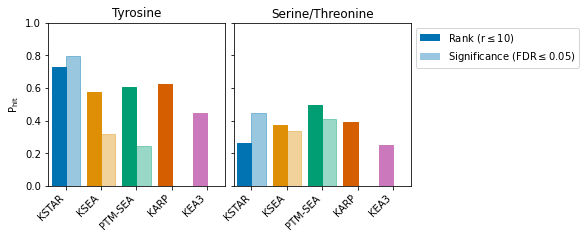

In [26]:
fig, axes = plt.subplots(ncols = 2, figsize = (6.5,3), sharey = 'row')
fig.subplots_adjust(wspace = 0.05)

Phit2 = Phit_sig.melt(ignore_index = False, value_name = '$P_{hit}$').reset_index()
Phit2['Metric'] = 'Significance'
Phit1 = Phit_rank.melt(ignore_index = False, value_name = '$P_{hit}$').reset_index()
Phit1['Metric'] = 'Rank'
plt_data = pd.concat([Phit1, Phit2], axis = 0)
plt_data.rename({'index':'Mod'}, axis = 1, inplace = True)
colors = list(sns.color_palette('colorblind', n_colors = 5))
bar = sns.barplot(x = 'variable', y = '$P_{hit}$', hue = 'Metric', data = plt_data[plt_data['Mod'] == 'Y'], ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('$\mathdefault{P_{hit}}$')
axes[0].set_ylim([0,1])
axes[0].get_legend().remove()
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 45, ha = 'right')
axes[0].set_title('Tyrosine')
#adjust colors
alpha = [1,0.4]
for j in range(len(alpha)):
    for i in range(len(colors)):
        if j == 0:
            bar.patches[i].set_color(colors[i])
            bar.patches[i].set_alpha(alpha[j])
        else:
            bar.patches[i+5].set_color(colors[i])
            bar.patches[i+5].set_alpha(alpha[j])
bar = sns.barplot(x = 'variable', y = '$P_{hit}$', hue = 'Metric', data = plt_data[plt_data['Mod'] == 'ST'], ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
#legend 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor=colors[0], label = 'Rank ($\mathdefault{r\leq10}$)'),
                   Patch(facecolor=colors[0], alpha = 0.4, label='Significance ($\mathdefault{FDR\leq0.05}$)')]
axes[1].legend(handles = legend_elements, bbox_to_anchor = (1,1))
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 45, ha = 'right')
axes[1].set_title('Serine/Threonine')
#adjust colors
alpha = [1,0.4]
for j in range(len(alpha)):
    for i in range(len(colors)):
        if j == 0:
            bar.patches[i].set_color(colors[i])
            bar.patches[i].set_alpha(alpha[j])
        else:
            bar.patches[i+5].set_color(colors[i])
            bar.patches[i+5].set_alpha(alpha[j])
            
#plt.savefig(odir+'accuracy_barplots.pdf', bbox_inches='tight')

### heatmaps

In [27]:
import seaborn as sns

##### All Kinases

In [28]:
mod = 'ST'
hits_matrix_sorted = hits_matrix_mod[mod].merge(m, left_on = 'Kinase', right_on = 'GENE', how = 'left').sort_values(by = 'm', ascending = False)
hits_matrix_sorted.index = hits_matrix_sorted['Kinase']
hits_matrix_sorted.drop(['Kinase','GENE','m'],axis = 1, inplace = True)
hits_matrix_sorted = hits_matrix_sorted.T

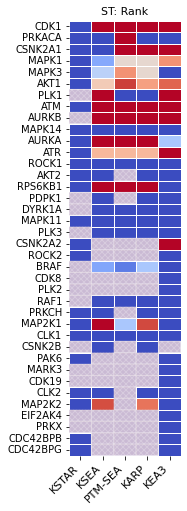

In [29]:
fig, ax = plt.subplots(figsize = (2,8))
hits_matrix_grouped = hits_matrix_sorted.T.groupby('Kinase').mean().reset_index()
hits_matrix_grouped = hits_matrix_grouped.merge(m, left_on = 'Kinase', right_on = 'GENE',how = 'left').sort_values(by = 'm', ascending = False)
hits_matrix_grouped.index = hits_matrix_grouped['Kinase']
hits_matrix_grouped.drop(['Kinase','GENE','m'],axis = 1, inplace = True)
#hits_matrix_grouped.dropna(inplace = True)
heat = sns.heatmap(hits_matrix_grouped, linewidths = 0.5, cmap = 'coolwarm', cbar = False, mask = hits_matrix_grouped.isnull(), ax = ax)
heat = heat.set_facecolor('white')
ax.set_yticks(ax.get_yticks(),rotation = 0, fontsize = 9)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,fontsize = 11, ha = 'right')
#plt.xticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('ST: Rank', fontsize = 11)
ax.set_facecolor('ghostwhite')
ax.pcolor(np.where(hits_matrix_grouped.isna(), 0, np.nan), hatch='xxxx', facecolor = 'white', edgecolor ='white', alpha=0.25, linewidths = 1)

##### Kinases with predictions for all algorithms:

In [36]:
#code to add bold grid around the triangles to delineate each experiment/algorithm
def add_offcenter_grid(x = [0,5], y = [0,8], increment = 1, c = 'black', lw = 2):
    for i in range(x[0],x[1]+1):
        plt.plot([i,i],y, ls = '-', c = c, lw = lw)
    
    for j in range(y[0],y[1]+1):
        plt.plot(x, [j,j], ls = '-', c = c, lw = lw)

In [37]:
#create the two matrices for heatmaps
mod = 'ST'
#create matrix for average rank hits
mat1 = hits_matrix_rank[mod].merge(m, left_on = 'Kinase', right_on = 'GENE', how = 'left').sort_values(by = 'm', ascending = False)
mat1.index = mat1['Kinase']
mat1.drop(['Kinase','GENE','m'],axis = 1, inplace = True)
mat1 = mat1.groupby('Kinase').mean().reset_index()
mat1 = mat1.merge(m, left_on = 'Kinase', right_on = 'GENE',how = 'left').sort_values(by = 'm', ascending = False)
mat1.index = mat1['Kinase']
mat1.dropna(inplace = True)
mat1.drop(['Kinase','GENE','m'],axis = 1, inplace = True)
#create matrix for average significance hits
mat2 = hits_matrix_sig[mod].merge(m, left_on = 'Kinase', right_on = 'GENE', how = 'left').sort_values(by = 'm', ascending = False)
mat2.index = mat2['Kinase']
mat2.drop(['Kinase','GENE','m'],axis = 1, inplace = True)
mat2 = mat2.groupby('Kinase').mean().reset_index()
mat2 = mat2.merge(m, left_on = 'Kinase', right_on = 'GENE',how = 'left').sort_values(by = 'm', ascending = False)
mat2.index = mat2['Kinase']
mat2.dropna(inplace = True)
mat2['KARP'] = np.nan
mat2['KEA3'] = np.nan
mat2.drop(['Kinase','GENE','m'],axis = 1, inplace = True)
mat2 = mat2.loc[mat1.index.values]

Text(0.5, 1.0, 'Serine/Threonine')

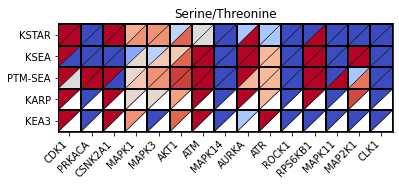

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
plt.figure(figsize = (6,2))
N = 5
M = mat1.shape[0]
x = np.arange(M + 1)
y = np.arange(N + 1)
xs, ys = np.meshgrid(x, y)
xs2,ys2 = np.meshgrid(np.arange(3,M+1), y)

#create triangle objects to use for plotting
triangles1 = [(i + j*(M+1), i+1 + (j+1)*(M+1), i + (j+1)*(M+1)) for j in range(N) for i in range(M)]
triangles2 = [(i + j*(M+1),i+1 + j*(M+1), i+1 + (j+1)*(M+1)) for j in range(N) for i in range(M)]
triang1 = Triangulation(xs.ravel(), ys.ravel(), triangles1)
triang2 = Triangulation(xs.ravel(), ys.ravel(), triangles2)

#resort matrix so that KSTAR appears  on top
mat1B = mat1[['KEA3','KARP','PTM-SEA','KSEA','KSTAR']]
mat2B = mat2[['KEA3','KARP','PTM-SEA','KSEA','KSTAR']]

#Plot upper left triangle (rank-based)
img1 = plt.tripcolor(triang1, mat1B.T.values.ravel(), cmap=plt.get_cmap('coolwarm'), vmax=1, vmin = 0, edgecolor = 'black', linewidths = 0.45)
#Plot lower right triangle (significance-based)
img2 = plt.tripcolor(triang2, mat2B.T.values.ravel(), cmap=plt.get_cmap('coolwarm'), vmax=1, vmin = 0, edgecolor = 'black', lw = 0.45)

#adjust ticks to match location and label of plot
plt.xlim(x[0]-0.02, x[-1])
plt.ylim(y[0], y[-1]+0.06)
plt.yticks([0.5,1.5,2.5,3.5,4.5],['KEA3','KARP','PTM-SEA','KSEA','KSTAR'], rotation=0)
plt.xticks(np.linspace(0.5,mat1.shape[0]-0.5,mat1.shape[0]), mat1.index)
plt.xticks(rotation = 45, ha = 'right')
#bold edges of each cell
add_offcenter_grid(x = [0, mat1.shape[0]], y = [0,5])
plt.title('Serine/Threonine')

### Number of kinases with predictions

Look at how many different kinases have predictions for each experiment

###### Y

In [30]:
plt_data = pd.DataFrame(num_kinases['ST']).melt(var_name = 'Algorithm', value_name = 'Number of Kinases with a Prediction')

Text(0.5, 1.0, 'Y')

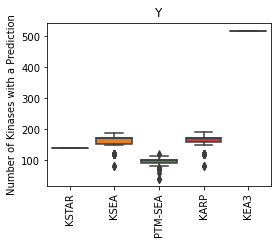

In [31]:
plt.figure(figsize = (4,3))
#box = sns.boxplot(x = 'Algorithm',y='Number of Kinases with a Prediction', data = plt_data[plt_data['Algorithm'] != 'KEA3'])
box = sns.boxplot(x = 'Algorithm',y='Number of Kinases with a Prediction', data = plt_data)
plt.xlabel('')
plt.xticks(rotation = 90)
plt.title('Y')

###### ST

In [33]:
plt_data = pd.DataFrame(num_kinases['ST']).melt(var_name = 'Algorithm', value_name = 'Number of Kinases with a Prediction')

Text(0.5, 1.0, 'ST')

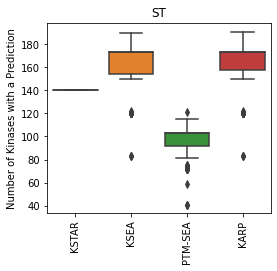

In [34]:
plt.figure(figsize = (4,3.5))
box = sns.boxplot(x = 'Algorithm',y='Number of Kinases with a Prediction', data = plt_data[plt_data['Algorithm'] != 'KEA3'])
plt.xlabel('')
plt.xticks(rotation = 90)
plt.title('ST')

Text(0.5, 1.0, 'ST')

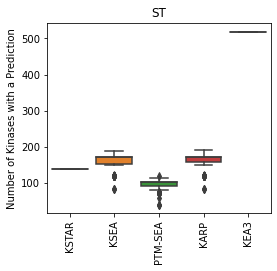

In [35]:
plt.figure(figsize = (4,3.5))
box = sns.boxplot(x = 'Algorithm',y='Number of Kinases with a Prediction', data = plt_data)
plt.xlabel('')
plt.xticks(rotation = 90)
plt.title('ST')

# Data Loss and Study Bias Experiment

### Generate random and targeted loss datasets

Write functions to generate the reduced experiments from either random or targeted (based on study bias, indicated by number of compendia a site is identified in) attack.

In [90]:
import math
import random

def randomlySelect(df, fraction, testNum, dataset):
    sample = df.sample(frac = fraction)
    sample.rename({f'data:All_{dataset}':f"data:random_{fraction}_test{testNum}_{dataset}"}, axis = 1, inplace = True)
    return sample

def studyBiasSelect(df, fraction, testNum,dataset):
    #shuffle order of dataframe, adding random element
    sample = df.sample(frac = 1)
    #sort based on num compendia
    sample = sample.sort_values(by = 'KSTAR_NUM_COMPENDIA', ascending = True)
    #pull sites equal to num_sites * fraction, starting with the least well studied sites
    numSites = round(df.shape[0]*fraction)
    sample = sample.iloc[0:numSites]
    
    #rename to mark the test
    sample.rename({f'data:All_{dataset}':f"data:biased_{fraction}_test{testNum}_{dataset}"}, axis = 1, inplace = True)
    return sample

def createTestDataset(df, data_col, fractions = [0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5], numTests = 5):
    new_df = df[['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS']+[data_col]].drop_duplicates(subset = ['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS'])
    #rename data col to indicate 100%
    study = data_col.split(':')[1]
    new_df.rename({data_col:f'data:All_{study}'}, axis = 1, inplace = True)
    #save original version of dataframe
    orig_df = new_df.copy()
    for frac in fractions:
        for test in range(numTests):
            rand = randomlySelect(orig_df, frac, test, study)
            new_df = new_df.merge(rand, how = 'left')
            biased = studyBiasSelect(orig_df, frac, test, study)
            new_df = new_df.merge(biased, how = 'left')
            
    return new_df

def createMasterDatasets(data):
    data_cols = [col for col in data.columns if 'data:' in col]
    all_data = None
    for col in data_cols:
        col_data = data.dropna(subset = [col])
        if all_data is None:
            all_data = createTestDataset(col_data, col)
        else:
            tmp_data = createTestDataset(col_data,col)
            all_data = all_data.merge(tmp_data, how = 'outer', on = ['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS'])
    
    return all_data

In [91]:
random.seed(100)
all_Y_tests = createMasterDatasets(y_data)

In [92]:
all_Y_tests.to_csv('all_Y_bias_tests.tsv', sep = '\t')

In [257]:
random.seed(100)
all_ST_tests = createMasterDatasets(st_data)

In [258]:
all_ST_tests.to_csv('all_ST_bias_tests.tsv', sep = '\t')

## Regenerate Predictions

Regenerate predictions using KSTAR, KSEA, and PTM-SEA, but only use datasets where the full dataset produces a hit:

#### KSEA

#### Y

In [93]:
test_data = pd.read_csv('all_Y_bias_tests.tsv', sep = '\t', index_col = 0)

In [94]:
#go through and only keep datasets where ksea succeeded
#extract study name without 'data:'
hits = np.unique([hit.split(',')[0].split(':')[1] for hit in dataset_hits['Y']['KSEA_PSP']])
keep = []
for col in test_data.columns:
    for h in hits:
        if h in col:
            keep.append(col)
            break
                  
test_data = test_data[['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS']+keep]

In [95]:
ksea = KSEA.KSEA(test_data, network,kinase_col = 'GENE', log_transform = True)
ksea.runKSEA()

C:\Users\Sam\miniconda3\envs\kstar\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

In [96]:
ksea.saveResults(fname = 'bias_Y', odir = './KSEA_results/Bias_testing/')

#### ST

In [260]:
test_data = pd.read_csv('all_ST_bias_tests.tsv', sep = '\t', index_col = 0)

In [261]:
#go through and only keep datasets where ksea succeeded
#extract study name without 'data:'
hits = np.unique([hit.split(',')[0].split(':')[1] for hit in dataset_hits['ST']['KSEA_PSP']])
keep = []
for col in test_data.columns:
    for h in hits:
        if h in col:
            keep.append(col)
            break
                  
test_data = test_data[['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS']+keep]

In [262]:
ksea = KSEA.KSEA(test_data, network,kinase_col = 'GENE', log_transform = True)
ksea.runKSEA()

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a c

C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)
C:\Users\Sam\OneDrive\Documents\GradSchool\Research\KinaseActivity\WorkForPaper\Benchmarking2\Algorithms\KSEA.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_exp.rename({data_col:'log2FC'}, inplace = True, axis = 1)


In [263]:
ksea.saveResults(fname = 'bias_ST', odir = './KSEA_results/Bias_testing/')

#### KSTAR

#### Y

In [97]:
test_data = pd.read_csv('all_Y_bias_tests.tsv', sep = '\t', index_col = 0)

In [98]:
#need to split the dataset between up and down
up_datasets = y_meta.loc[y_meta['Direction'] == 'Up','Dataset'].unique()
down_datasets = y_meta.loc[y_meta['Direction'] == 'Down','Dataset'].unique()

In [99]:
#go through and only keep datasets where ksea succeeded
#extract study name without 'data:'
hits = np.unique([hit.split(',')[0].split(':')[1] for hit in dataset_hits['Y']['KSTAR']])
keep_up = []
keep_down = []
for col in test_data.columns:
    for h in hits:
        if h in col:
            for data in up_datasets:
                if h in data:
                    keep_up.append(col)
                    break
            for data in down_datasets:
                if h in data:
                    keep_down.append(col)
                    break
            break
test_data_up = test_data[['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS']+keep_up]
test_data_down = test_data[['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS']+keep_down]

In [100]:
test_data_up.to_csv('./KSTAR_work/KSTAR_inputs/Bias/y_bias_up.tsv',sep='\t')
test_data_down.to_csv('./KSTAR_work/KSTAR_inputs/Bias/y_bias_down.tsv',sep='\t')

Ran KSTAR analysis using nextflow implementation

#### ST

In [263]:
test_data = pd.read_csv('all_ST_bias_tests.tsv', sep = '\t', index_col = 0)

In [264]:
#need to split the dataset between up and down
up_datasets = st_meta.loc[st_meta['Direction'] == 'Up','Dataset'].unique()
down_datasets = st_meta.loc[st_meta['Direction'] == 'Down','Dataset'].unique()

In [265]:
#go through and only keep datasets where ksea succeeded
#extract study name without 'data:'
hits = np.unique([hit.split(',')[0].split(':')[1] for hit in dataset_hits['ST']['KSTAR']])
keep_up = []
keep_down = []
for col in test_data.columns:
    for h in hits:
        if h in col:
            for data in up_datasets:
                if h in data:
                    keep_up.append(col)
                    break
            for data in down_datasets:
                if h in data:
                    keep_down.append(col)
                    break
            break
test_data_up = test_data[['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS']+keep_up]
test_data_down = test_data[['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS']+keep_down]

In [266]:
test_data_up.to_csv('./KSTAR_work/KSTAR_inputs/Bias/st_bias_up.tsv',sep='\t')
test_data_down.to_csv('./KSTAR_work/KSTAR_inputs/Bias/st_bias_down.tsv',sep='\t')

Ran KSTAR analysis using nextflow implementation

#### PTM-SEA

#### Y

In [101]:
test_data = pd.read_csv('all_Y_bias_tests.tsv', sep = '\t', index_col = 0)

In [102]:
#go through and only keep datasets where ksea succeeded
#extract study name without 'data:'
hits = np.unique([hit.split(',')[0].split(':')[1] for hit in dataset_hits['Y']['PTM-SEA']])
keep = []
for col in test_data.columns:
    for h in hits:
        if h in col:
            keep.append(col)
            break
                  
test_data = test_data[['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS']+keep]

In [103]:
data_cols = [col for col in test_data.columns if 'data:' in col]
test_data = test_data.dropna(subset = data_cols, how = 'all')

In [104]:
test_data['KSTAR_SUBSTRATE'] = test_data['KSTAR_ACCESSION']+'_'+test_data['KSTAR_SITE']
test_data['id.uniprot'] = test_data['KSTAR_SUBSTRATE'].apply(lambda x: x.split('_')[0]+';'+x.split('_')[1]+'-p')
test_data['id.flanking'] = test_data['KSTAR_PEPTIDE'].apply(lambda x: x.upper()+'-p')
test_data.drop_duplicates(subset = ['id.uniprot'], inplace = True)

In [105]:
test_data.to_csv('./PTM-SEA/Bias/y_bias.tsv',sep='\t')

Ran using ssGSEA-gui for PTM-SEA

#### ST

In [275]:
test_data = pd.read_csv('all_ST_bias_tests.tsv', sep = '\t', index_col = 0)

In [276]:
#go through and only keep datasets where ksea succeeded
#extract study name without 'data:'
hits = np.unique([hit.split(',')[0].split(':')[1] for hit in dataset_hits['ST']['PTM-SEA']])
keep = {}
for col in test_data.columns:
    for h in hits:
        if h in col:
            if h in keep:
                keep[h].append(col)
            else:
                keep[h] = [col]
            break

#get individual datasets for each
test_data_split = {}
for hit in keep.keys():
    tmp =  test_data[['KSTAR_ACCESSION','KSTAR_SITE','KSTAR_PEPTIDE','KSTAR_NUM_COMPENDIA','KSTAR_NUM_COMPENDIA_CLASS']+keep[hit]]
    data_cols = [col for col in tmp.columns if 'data:' in col]
    tmp = tmp.dropna(subset = data_cols, how = 'all')
    tmp['KSTAR_SUBSTRATE'] = tmp['KSTAR_ACCESSION']+'_'+tmp['KSTAR_SITE']
    tmp['id.uniprot'] = tmp['KSTAR_SUBSTRATE'].apply(lambda x: x.split('_')[0]+';'+x.split('_')[1]+'-p')
    tmp['id.flanking'] = tmp['KSTAR_PEPTIDE'].apply(lambda x: x.upper()+'-p')
    tmp.drop_duplicates(subset = ['id.uniprot'], inplace = True)
    tmp.to_csv(f'./PTM-SEA/Bias/st_bias_{hit}.tsv', sep = '\t')

Ran using ssGSEA-gui for PTM-SEA

## Analyze results

### Process

#### KSTAR

In [100]:
#Y
y_0_50 = pd.read_csv(odir + 'BenchmarkingResults/Sensitivity (Fig. 4)/Results/KSTAR/kstar_loss0-50_Y_mann_whitney_fpr.tsv', sep = '\t', index_col = 0)
y_50_100 = pd.read_csv(odir + 'BenchmarkingResults/Sensitivity (Fig. 4)/Results/KSTAR/kstar_loss50-100_Y_mann_whitney_fpr.tsv', sep = '\t', index_col = 0)
fdr = pd.concat([y_0_50,y_50_100], axis = 1)

# go through and extract information from tests
res_all_Y = None
for hit in dataset_hits['Y']['KSTAR']:
    #find columns associated with study
    study = hit.split(',')[0].split(':')[1]
    keep = []
    for col in fdr.columns:
        if study in col:
            keep.append(col)
    res = fdr[keep]
    #extract only the kinase of interest
    kin = hit.split(',')[1]
    res = res.melt(ignore_index = False).loc[kin]
    res['Study'] = study
    res['Kinase'] = kin
    res['Fraction'] = res['variable'].apply(lambda x: 1 if 'All' in x else float(x.split('_')[1]))
    res['Selection'] = res['variable'].apply(lambda x: 'Biased' if 'biased' in x else ('random' if 'random' in x else 'All'))
    res.drop('variable', axis = 1, inplace = True)
    if res_all_Y is None:
        res_all_Y = res.copy()
    else:
        res_all_Y = pd.concat([res_all_Y,res])
        
res_all_Y['Algorithm'] = 'KSTAR'
res_all_Y['Mod'] = 'Y'

#ST
st_0_50 = pd.read_csv(odir + 'BenchmarkingResults/Sensitivity (Fig. 4)/Results/KSTAR/kstar_loss0-50_ST_mann_whitney_fpr.tsv', sep = '\t', index_col = 0)
st_50_100 = pd.read_csv(odir+'BenchmarkingResults/Sensitivity (Fig. 4)/Results/KSTAR/kstar_loss50-100_ST_mann_whitney_fpr.tsv', sep = '\t', index_col = 0)
fdr = pd.concat([st_0_50,st_50_100], axis = 1)

# go through and extract information from tests
res_all_ST = None
for hit in dataset_hits['ST']['KSTAR']:
    #find columns associated with study
    study = hit.split(',')[0].split(':')[1]
    keep = []
    for col in fdr.columns:
        if study in col:
            keep.append(col)
    res = fdr[keep]
    #extract only the kinase of interest
    kin = hit.split(',')[1]
    res = res.melt(ignore_index = False).loc[kin]
    res['Study'] = study
    res['Kinase'] = kin
    res['Fraction'] = res['variable'].apply(lambda x: 1 if 'All' in x else float(x.split('_')[1]))
    res['Selection'] = res['variable'].apply(lambda x: 'Biased' if 'biased' in x else ('random' if 'random' in x else 'All'))
    res.drop('variable', axis = 1, inplace = True)
    if res_all_ST is None:
        res_all_ST = res.copy()
    else:
        res_all_ST = pd.concat([res_all_ST,res])
        
res_all_ST['Algorithm'] = 'KSTAR'
res_all_ST['Mod'] = 'ST'

#res_all = res_all_Y
res_all = pd.concat([res_all_Y, res_all_ST])

#### KSEA

In [101]:
#Y
y_0_50 = pd.read_csv(odir + 'BenchmarkingResults/Sensitivity (Fig. 4)/Results/KSEA/KSEA_DataLoss0-50_Y_FDR.tsv', sep = '\t', index_col = 0)
y_50_100 = pd.read_csv(odir + 'BenchmarkingResults/Sensitivity (Fig. 4)/Results/KSEA/KSEA_DataLoss50-100_Y_FDR.tsv', sep = '\t', index_col = 0)
fdr = pd.concat([y_0_50,y_50_100], axis = 1)

# go through and extract information from tests
res_all_Y = None
for hit in dataset_hits['Y']['KSEA']:
    #find columns associated with study
    study = hit.split(',')[0].split(':')[1]
    keep = []
    for col in fdr.columns:
        if study in col:
            keep.append(col)
    res = fdr[keep]
    #extract only the kinase of interest
    kin = hit.split(',')[1]
    res = res.melt(ignore_index = False).loc[kin]
    res['Study'] = study
    res['Kinase'] = kin
    res['Fraction'] = res['variable'].apply(lambda x: 1 if 'All' in x else float(x.split('_')[1]))
    res['Selection'] = res['variable'].apply(lambda x: 'Biased' if 'biased' in x else ('random' if 'random' in x else 'All'))
    res.drop('variable', axis = 1, inplace = True)
    if res_all_Y is None:
        res_all_Y = res.copy()
    else:
        res_all_Y = pd.concat([res_all_Y,res])
        
res_all_Y['Algorithm'] = 'KSEA'
res_all_Y['Mod'] = 'Y'

#ST
st_0_50 = pd.read_csv(odir + 'BenchmarkingResults/Sensitivity (Fig. 4)/Results/KSEA/KSEA_DataLoss0-50_ST_FDR.tsv', sep = '\t', index_col = 0)
st_50_100 = pd.read_csv(odir + 'BenchmarkingResults/Sensitivity (Fig. 4)/Results/KSEA/KSEA_DataLoss50-100_ST_FDR.tsv', sep = '\t', index_col = 0)
fdr = pd.concat([st_0_50,st_50_100], axis = 1)

# go through and extract information from tests
res_all_ST = None
for hit in dataset_hits['ST']['KSEA']:
    #find columns associated with study
    study = hit.split(',')[0].split(':')[1]
    keep = []
    for col in fdr.columns:
        if study in col:
            keep.append(col)
    res = fdr[keep]
    #extract only the kinase of interest
    kin = hit.split(',')[1]
    res = res.melt(ignore_index = False).loc[kin]
    res['Study'] = study
    res['Kinase'] = kin
    res['Fraction'] = res['variable'].apply(lambda x: 1 if 'All' in x else float(x.split('_')[1]))
    res['Selection'] = res['variable'].apply(lambda x: 'Biased' if 'biased' in x else ('random' if 'random' in x else 'All'))
    res.drop('variable', axis = 1, inplace = True)
    if res_all_ST is None:
        res_all_ST = res.copy()
    else:
        res_all_ST = pd.concat([res_all_ST,res])
        
res_all_ST['Algorithm'] = 'KSEA'
res_all_ST['Mod'] = 'ST'

#res_all = pd.concat([res_all, res_all_Y])

res_all = pd.concat([res_all, res_all_Y, res_all_ST])

#### PTM-SEA

In [102]:
#Y
fdr = pd.read_csv(odir + 'BenchmarkingResults/Sensitivity (Fig. 4)/Results/PTM-SEA/ptm-sea_DataLoss0-50_Y_pvals.csv', index_col = 0)

#identify perturbations to keep
keep = []
new_index = {}
for pert in fdr.index:
    if 'KINASE' in pert:
        keep.append(pert)
        if '/' in pert: 
            new_index[pert] = pert.split('/')[-1]
        else:
            new_index[pert] = pert.split('_')[-1]
fdr = fdr.loc[keep]
fdr.rename(new_index, inplace = True)
#replace colnames from 'data.' to 'data:'
new_col = {}
for col in fdr.columns:
    new_col[col] = col.replace('data.','data:')
    
fdr.rename(new_col, axis = 1, inplace = True)

# go through and extract information from tests
res_all_Y = None
for hit in dataset_hits['Y']['PTM-SEA']:
    #find columns associated with study
    study = hit.split(',')[0].split(':')[1]
#    if study == 'EGF_16min_WY2007':
#        continue
    keep = []
    for col in fdr.columns:
        if study in col:
            keep.append(col)
    res = fdr[keep]
    #extract only the kinase of interest
    kin = hit.split(',')[1]
#    if kin == 'ZAP70' or kin == 'EPHA2' or kin == 'KDR':
#        continue
    res = res.melt(ignore_index = False).loc[kin]
    res['Study'] = study
    res['Kinase'] = kin
    res['Fraction'] = res['variable'].apply(lambda x: 1 if 'All' in x else float(x.split('_')[1]))
    res['Selection'] = res['variable'].apply(lambda x: 'Biased' if 'biased' in x else ('random' if 'random' in x else 'All'))
    res.drop('variable', axis = 1, inplace = True)
    if res_all_Y is None:
        res_all_Y = res.copy()
    else:
        res_all_Y = pd.concat([res_all_Y,res])
        
res_all_Y['Algorithm'] = 'PTM-SEA'
res_all_Y['Mod'] = 'Y'

#ST
st_0_50 = pd.read_csv(odir + 'BenchmarkingResults/Sensitivity (Fig. 4)/Results/PTM-SEA/ptm-sea_DataLoss0-50_ST_pvals.csv', index_col = 0)
st_50_100 = pd.read_csv(odir + 'BenchmarkingResults/Sensitivity (Fig. 4)/Results/PTM-SEA/ptm-sea_DataLoss50-100_ST_pvals.csv', index_col = 0)
fdr = pd.concat([st_0_50,st_50_100], axis = 1)

#identify perturbations to keep
keep = []
new_index = {}
for pert in fdr.index:
    if 'KINASE' in pert:
        keep.append(pert)
        if '/' in pert: 
            new_index[pert] = pert.split('/')[-1]
        else:
            new_index[pert] = pert.split('_')[-1]
fdr = fdr.loc[keep]
fdr.rename(new_index, inplace = True)
#replace colnames from 'data.' to 'data:'
new_col = {}
for col in fdr.columns:
    tmp = col.replace('data.','data:')
    new_col[col] = tmp.replace('MK.2206', 'MK-2206')
    
    
fdr.rename(new_col, axis = 1, inplace = True)

# go through and extract information from tests
res_all_ST = None
for hit in dataset_hits['ST']['PTM-SEA']:
    #find columns associated with study
    study = hit.split(',')[0].split(':')[1]
    keep = []
    for col in fdr.columns:
        if study in col:
            keep.append(col)
    res = fdr[keep]
    #extract only the kinase of interest
    kin = hit.split(',')[1]
    res = res.melt(ignore_index = False).loc[kin]
    res['Study'] = study
    res['Kinase'] = kin
    res['Fraction'] = res['variable'].apply(lambda x: 1 if 'All' in x else float(x.split('_')[1]))
    res['Selection'] = res['variable'].apply(lambda x: 'Biased' if 'biased' in x else ('random' if 'random' in x else 'All'))
    res.drop('variable', axis = 1, inplace = True)
    if res_all_ST is None:
        res_all_ST = res.copy()
    else:
        res_all_ST = pd.concat([res_all_ST,res])
        
res_all_ST['Algorithm'] = 'PTM-SEA'
res_all_ST['Mod'] = 'ST'


#res_all = pd.concat([res_all, res_all_Y])

res_all = pd.concat([res_all, res_all_Y, res_all_ST])
res_all.drop_duplicates(inplace = True)

## Calculate Tolerable Data Loss and Sensitivities

##### Tolerable Data Loss

In [109]:
tmp

,value,Study,Kinase,Fraction,Selection
RPS6KB1,1,AKT_AZD5363_Wiechmann,RPS6KB1,1.00,All
RPS6KB1,1,AKT_AZD5363_Wiechmann,RPS6KB1,1.00,All
RPS6KB1,1,AKT_AZD5363_Wiechmann,RPS6KB1,0.95,random
RPS6KB1,1,AKT_AZD5363_Wiechmann,RPS6KB1,0.95,Biased
RPS6KB1,1,AKT_AZD5363_Wiechmann,RPS6KB1,0.90,random
...,...,...,...,...,...
ATM,1,DNAdamage_IR_Beli,ATM,0.10,random
ATM,0,DNAdamage_IR_Beli,ATM,0.05,random
ATM,0,DNAdamage_IR_Beli,ATM,0.05,Biased
ATM,0,DNAdamage_IR_Beli,ATM,0.05,random


In [107]:
tdl = {'random':{'Y':{'KSTAR':[],'KSEA':[],'PTM-SEA':[]},
                                    'ST':{'KSTAR':[],'KSEA':[], 'PTM-SEA':[]}},
                            'Biased': {'Y':{'KSTAR':[],'KSEA':[],'PTM-SEA':[]},
                                    'ST':{'KSTAR':[],'KSEA':[], 'PTM-SEA':[]}}}
condition = {'random':{'Y':{'KSTAR':[],'KSEA':[],'PTM-SEA':[]},
                                    'ST':{'KSTAR':[],'KSEA':[], 'PTM-SEA':[]}},
                            'Biased': {'Y':{'KSTAR':[],'KSEA':[],'PTM-SEA':[]},
                                    'ST':{'KSTAR':[],'KSEA':[], 'PTM-SEA':[]}}}

tmp_all = res_all.copy()
tmp_all['value'] = (tmp_all['value'] <= 0.05) * 1
for mod in tdl['random'].keys():
    for alg in tdl['random'][mod].keys():

        tmp = tmp_all[tmp_all['Algorithm'] == alg]
        tmp = tmp[tmp['Mod'] == mod]
        tmp.dropna(subset = 'value', inplace = True)
        tmp = tmp.drop(['Algorithm','Mod'], axis = 1)
        mean = tmp.groupby(['Study','Kinase','Fraction','Selection']).mean()
        mean = mean.reset_index()
        for study in mean['Study'].unique():
            study_data = mean[mean['Study'] == study]
            for kin in study_data['Kinase'].unique():
                for selection in ['Biased','random']:
                    condition[selection][mod][alg].append(study+','+kin)
                    test_data = study_data[study_data['Kinase'] == kin]
                    #remove any nan
                    #calculate the area under the curve of biased results via trapezoidal rule
                    random = test_data[test_data['Selection'] != selection]
                    random.dropna(subset = ['value'], inplace = True)
                    for frac in [0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05]:
                        hits_frac = random.loc[random['Fraction'] == frac, 'value'].values
                        if hits_frac <= 0.5:
                            tdl[selection][mod][alg].append(1-frac)
                            break
                        elif frac == random['Fraction'].min():
                            tdl[selection][mod][alg].append(1 - random['Fraction'].min())
                            break

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2378930958.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ran

In [113]:
#reformat dictionary into dataframe
tdl_plt_data = None
for selection in ['Biased', 'random']:
    if selection == 'Biased':
        sel_name = 'Random'
    else:
        sel_name = 'Targeted'
    for mod in ['Y',"ST"]:
        for alg in tdl[selection][mod].keys():
            if tdl_plt_data is None:
                tdl_plt_data = pd.DataFrame({'Tolerable Data Loss (%)':tdl[selection][mod][alg], 'Algorithm':alg, 'Mod': mod, 'Selection': sel_name, 'Condition': condition[selection][mod][alg]})
            else:
                tdl_plt_data = pd.concat([tdl_plt_data, pd.DataFrame({'Tolerable Data Loss (%)':tdl[selection][mod][alg],'Algorithm':alg, 'Mod':mod, 'Selection': sel_name, 'Condition': condition[selection][mod][alg]})])
                
#convert to percentages
tdl_plt_data['Tolerable Data Loss (%)'] = tdl_plt_data['Tolerable Data Loss (%)']*100

##### Sensitivities

In [55]:
res_all['Condition'] =  res_all['Study']+','+res_all['Kinase']

#missing values -> FPR = 1
random_score = {'Y': {'KSTAR':[],'KSEA':[],'PTM-SEA':[]},
             'ST': {'KSTAR':[],'KSEA':[],'PTM-SEA':[]}}
bias_score = {'Y': {'KSTAR':[],'KSEA':[],'PTM-SEA':[]},
             'ST': {'KSTAR':[],'KSEA':[],'PTM-SEA':[]}}
diff_score = {'Y': {'KSTAR':[],'KSEA':[],'PTM-SEA':[]},
             'ST': {'KSTAR':[],'KSEA':[],'PTM-SEA':[]}}
conditions = {'Y': {'KSTAR':[],'KSEA':[],'PTM-SEA':[]},
             'ST': {'KSTAR':[],'KSEA':[],'PTM-SEA':[]}}
kinases = {'Y': {'KSTAR':[],'KSEA':[],'PTM-SEA':[]},
             'ST': {'KSTAR':[],'KSEA':[],'PTM-SEA':[]}}
res_all2 = res_all[res_all['Fraction'] >= 0.5]
for mod in diff_score.keys():
    for alg in diff_score[mod].keys():
        tmp = res_all2[res_all2['Algorithm'] == alg]
        tmp = tmp[tmp['Mod'] == mod]
        tmp = tmp.drop(['Algorithm','Mod'], axis = 1)
        mean = tmp.groupby(['Study','Kinase','Fraction','Selection','Condition']).mean()
        mean = mean.reset_index()
        for study in mean['Study'].unique():
            study_data = mean[mean['Study'] == study]
            study_data.replace(np.nan, 1, inplace = True)
            for kin in study_data['Kinase'].unique():
                test_data = study_data[study_data['Kinase'] == kin]
                #remove any nan
                #get random adn biased data: find the lowest fraction where both have predictions (will stop integral calculation here)
                biased = test_data[test_data['Selection'] != 'random']
                biased.dropna(subset = ['value'], inplace = True)
                random = test_data[test_data['Selection'] != 'Biased']
                random.dropna(subset = ['value'], inplace = True)
                stop_fraction = np.max([random['Fraction'].min(), biased['Fraction'].min()])
                #calculate the area under the curve of biased results via trapezoidal rule
                trap_sum = 0
                biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
                for frac in biased['Fraction']:
                    #check to see if passed stop fraction
                    if frac < stop_fraction:
                        break
                    #continue calculating integral
                    elif frac == 1 or frac == stop_fraction:
                        trap_sum = biased.loc[biased['Fraction'] == frac, 'value'].values + trap_sum
                    else:
                        trap_sum = 2*biased.loc[biased['Fraction'] == frac, 'value'].values + trap_sum
                #trap area = (deltaX/2)* [f(1)+2*f(0.9)+...+f(xMin)]
                biased_area = (5)/2*(trap_sum)
                bias_score[mod][alg].append(biased_area[0])
                #calculate the area under the curve of random results via trapezoidal rule
                trap_sum = 0
                random.sort_values(by = 'Fraction', ascending = False, inplace = True)
                for frac in random['Fraction']:
                    #check to see if passed stop fraction
                    if frac < stop_fraction:
                        break
                    #continue calculating integral
                    elif frac == 1 or frac == stop_fraction:
                        trap_sum = random.loc[random['Fraction'] == frac, 'value'].values + trap_sum
                    else:
                        trap_sum = 2*random.loc[random['Fraction'] == frac, 'value'].values + trap_sum
                #trap area = (deltaX/2)* [f(1)+2*f(0.9)+...+f(xMin)]
                random_area = 5/2*(trap_sum)
                base_area = 0.5*random.loc[random['Selection'] == 'All','value'].values
                random_score[mod][alg].append(random_area[0])


                diff_score[mod][alg].append(biased_area[0] - random_area[0])
                conditions[mod][alg].append(test_data['Condition'].unique()[0])
                kinases[mod][alg].append(test_data['Kinase'].unique()[0])

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_data.replace(np.nan, 1, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_data.replace(np.nan, 1, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_data.replace(np.nan, 1, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_data.replace(np.nan, 1, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_data.replace(np.nan, 1, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_data.replace(np.nan, 1, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_data.replace(np.nan, 1, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_data.replace(np.nan, 1, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_data.replace(np.nan, 1, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.sort_values(by = 'Fraction', ascending = False, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bia

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_data.replace(np.nan, 1, inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biased.dropna(subset = ['value'], inplace = True)
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2348230202.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random.

In [70]:
selection = 'Random'
sensitivity = None
mods = ['Y', 'ST']

for mod in mods:
    for alg in random_score[mod].keys():
            if sensitivity is None:
                sensitivity = pd.DataFrame({'Sensitivity':random_score[mod][alg], 'Algorithm':alg, 'Condition': conditions[mod][alg], 'Selection': 'Random', 'Mod':mod})
            else:
                sensitivity = pd.concat([sensitivity, pd.DataFrame({'Sensitivity':random_score[mod][alg],'Algorithm':alg, 'Condition': conditions[mod][alg], 'Selection': 'Random','Mod':mod})])

selection = 'Targeted'      
for mod in mods:
    for alg in diff_score[mod].keys():
        sensitivity = pd.concat([sensitivity, pd.DataFrame({'Sensitivity':diff_score[mod][alg],'Algorithm':alg, 'Condition': conditions[mod][alg], 'Selection': 'Targeted', 'Mod':mod})])
            
sensitivity.reset_index(inplace = True)

## Plot

### Plot representative curves

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/4115391138.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  barea_under_curve = barea_under_curve.append(new_row, ignore_index = True).sort_values('value', ascending = False).sort_values('Fraction')
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/4115391138.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmean_extra = rmean_extra.append(new_row, ignore_index = True).sort_values('value', ascending = False).sort_values('Fraction')


Text(-0.05, 0.5, 'Sensitivity to Study Bias')

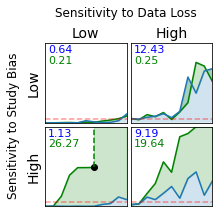

In [73]:
studies = [[['KSTAR', "Y", 'VEGF_30min_Zhuang', 'FLT1', '8'], ['KSEA','Y','Dasatinib_Giansanti','EPHA2', '13']],
    [['PTM-SEA','Y','EGF_10min_WY2006', 'EGFR', '6'], ['PTM-SEA', 'Y', 'EGF_16min_WY2007', 'EGFR', '5'],]]


rdata = sensitivity[sensitivity['Selection'] == "Random"]
bdata = sensitivity[sensitivity['Selection'] == "Targeted"]
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (3,3), sharex = 'row',sharey = 'col')
fig.subplots_adjust(hspace = 0.05, wspace = 0.05)
for i in range(len(studies)):
    row = studies[i]
    for j in range(len(row)):
        plt_info = row[j]
        tmp = res_all[res_all['Algorithm'] == plt_info[0]]
        tmp = tmp[tmp['Mod'] == plt_info[1]]
        tmp = tmp[tmp['Study'] == plt_info[2]]
        tmp = tmp[tmp['Kinase'] == plt_info[3]]
        tmp = tmp.drop(['Study', 'Kinase', 'Algorithm', 'Mod'], axis = 1)
        tmp = tmp[tmp['Fraction'] >= 0.5]
        mean = tmp.groupby(['Fraction','Selection']).mean()
        mean = mean.reset_index()
        std = tmp.groupby(['Fraction','Selection']).std()
        std = std.reset_index()
        bmean = mean[mean['Selection'] != 'random']
        bstd = std[std['Selection'] != 'random']
        rmean = mean[mean['Selection'] != 'Biased']
        rstd = std[std['Selection'] != 'Biased']
        axes[j,i].plot(bmean['Fraction'],bmean['value'], color = 'green', label = 'Biased')
        axes[j,i].plot(rmean['Fraction'],rmean['value'], label = 'Random')
        axes[j,i].fill_between(rmean['Fraction'], rmean['value'], 0, alpha = 0.2)
        axes[j,i].axhline(0.05, c = 'red', linestyle = 'dashed', alpha = 0.4)
        axes[j,i].set_xlim([1,0.5])
        axes[j,i].set_ylim([0,1])
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        #add annotations with sensitivity scores
        tmp2 = rdata[rdata['Algorithm'] == plt_info[0]]
        tmp2 = tmp2[tmp2['Condition'] == plt_info[2]+','+plt_info[3]]
        axes[j,i].annotate(round(tmp2['Sensitivity'].values[0], 2), (0.98, 0.88), c = 'blue', fontsize = 11)
        #add annotations with sensitivity scores
        tmp2 = bdata[bdata['Algorithm'] == plt_info[0]]
        tmp2 = tmp2[tmp2['Condition'] == plt_info[2]+','+plt_info[3]]
        axes[j,i].annotate(round(tmp2['Sensitivity'].values[0], 2), (0.98, 0.75), c = 'green', fontsize = 11)
        #add annotations indicating algorithm
        #axes[j,i].annotate(plt_info[0], (0.5,0.88), fontsize = 9, ha = 'right')
        #axes[j,i].annotate(plt_info[3], (0.5,0.78), fontsize = 9, ha = 'right')
        #axes[j,i].annotate('Exp. '+plt_info[4], (0.5,0.68), fontsize = 9, ha = 'right')
        #extension to portion of curve that was lost
        if j == 1 and i == 0:
            coverage_loss = bmean.dropna()
            x1 = coverage_loss['Fraction'].min()
            barea_under_curve = bmean.replace(np.nan, 1)
            new_row = {'Fraction':x1, 'Selection':'Biased','value':1}
            barea_under_curve = barea_under_curve.append(new_row, ignore_index = True).sort_values('value', ascending = False).sort_values('Fraction')
            rmean_extra = rmean.copy()
            new_row = {'Fraction':x1, 'Selection':'Biased','value':rmean.loc[rmean['Fraction'] == x1, 'value'].values[0]}
            rmean_extra = rmean_extra.append(new_row, ignore_index = True).sort_values('value', ascending = False).sort_values('Fraction')
            #add point where data is lost
            axes[j,i].plot(x1, coverage_loss.loc[coverage_loss['Fraction'] == coverage_loss['Fraction'].min(), 'value'], marker = 'o', c = 'k')
            axes[j,i].plot([x1,x1], [coverage_loss.loc[coverage_loss['Fraction'] == x1, 'value'].values[0], 1], c = 'green', ls = 'dashed')
            axes[j,i].fill_between(barea_under_curve['Fraction'], barea_under_curve['value'],rmean_extra['value'], color = 'green', alpha = 0.2)
        else:
            axes[j,i].fill_between(bmean['Fraction'], bmean['value'],rmean['value'], color = 'green', alpha = 0.2)
            
axes[0,0].set_ylabel('Low', fontsize = 14)
axes[0,0].set_title('Low', fontsize = 14)
axes[1,0].set_ylabel('High', fontsize = 14)
axes[0,1].set_title('High', fontsize = 14)
fig.suptitle('Sensitivity to Data Loss', y = 1.05)
fig.supylabel('Sensitivity to Study Bias', x = -0.05)

##### Plot all average tyrosine kinase curves

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2248708077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata['Kinase'] = rdata['Condition'].apply(lambda x: x.split(',')[1])
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2248708077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdata['Kinase'] = bdata['Condition'].apply(lambda x: x.split(',')[1])
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2248708077.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas

Text(-0.025, 0.5, 'False Discovery Rate')

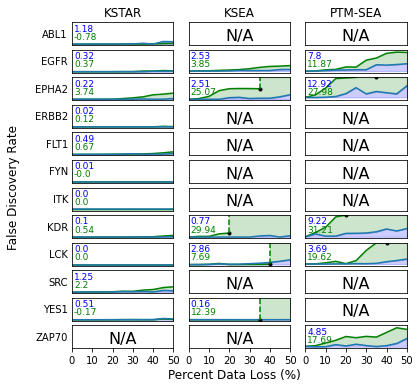

In [78]:
rdata['Kinase'] = rdata['Condition'].apply(lambda x: x.split(',')[1])
bdata['Kinase'] = bdata['Condition'].apply(lambda x: x.split(',')[1])
rand_sens = rdata.groupby(['Kinase', 'Algorithm']).mean().reset_index()
bias_sens = bdata.groupby(['Kinase','Algorithm']).mean().reset_index()
#Y
mod = 'Y'
tmp = res_all[res_all['Mod'] == mod].sort_values('Kinase')
tmp['condition'] = tmp['Study']+','+tmp['Kinase']
tmp['Fraction'] = (1-tmp['Fraction'])*100
tmp = tmp[tmp['Fraction'] <= 50]
num_cases = tmp['Kinase'].nunique()
#plot
fig, axes = plt.subplots(ncols = 3, nrows = num_cases, sharey = 'row', figsize = (6,6))
fig.subplots_adjust(wspace = 0.15)

cases = tmp['Kinase'].unique()
algorithms = ['KSTAR','KSEA',"PTM-SEA"]
for i in range(tmp['Kinase'].nunique()):
    kinase = cases[i]
    for j in range(len(algorithms)):
        tmp2 = tmp[tmp['Algorithm'] == algorithms[j]]
        tmp2 = tmp2[tmp2['Kinase'] == kinase]
        tmp2 = tmp2.drop(['Study', 'Kinase', 'Algorithm','Mod'], axis = 1)
        if tmp2.shape[0] > 0:
            mean = tmp2.groupby(['Fraction','Selection']).mean()
            mean = mean.reset_index()
            std = tmp2.groupby(['Fraction','Selection']).std()
            std = std.reset_index()
            bmean = mean[mean['Selection'] != 'random']
            bstd = std[std['Selection'] != 'random']
            rmean = mean[mean['Selection'] != 'Biased']
            rstd = std[std['Selection'] != 'Biased']
            axes[i,j].plot(bmean['Fraction'],bmean['value'], color = 'green', label = 'Biased')
            axes[i,j].plot(rmean['Fraction'],rmean['value'], label = 'Random')
            axes[i,j].fill_between(rmean['Fraction'], rmean['value'],rmean['value'].min(), color = 'blue', alpha = 0.2)
            #add annotations with sensitivity scores
            tmp3 = rand_sens[rand_sens['Algorithm'] == algorithms[j]]
            axes[i,j].annotate(round(tmp3.loc[tmp3['Kinase'] == kinase, 'Sensitivity'].values[0], 2), (0.98, 0.62), c = 'blue', fontsize = 9)
            #add annotations with sensitivity scores
            tmp4 = bias_sens[bias_sens['Algorithm'] == algorithms[j]]
            axes[i,j].annotate(round(tmp4.loc[tmp4['Kinase'] == kinase, 'Sensitivity'].values[0], 2), (0.98, 0.25), c = 'green', fontsize = 9)
            #axes[i,0].axhline(0.05, c = 'red', linestyle = 'dashed', alpha = 0.4)
            if bmean.dropna()['Fraction'].max() < 50:
                coverage_loss = bmean.dropna()
                x1 = coverage_loss['Fraction'].max()
                barea_under_curve = bmean.replace(np.nan, 1)
                new_row = {'Fraction':x1, 'Selection':'Biased','value':1}
                barea_under_curve = barea_under_curve.append(new_row, ignore_index = True).sort_values('value', ascending = False).sort_values('Fraction', ascending = False)
                rmean_extra = rmean.copy()
                new_row = {'Fraction':x1, 'Selection':'Targeted','value':rmean.loc[rmean['Fraction'] == x1, 'value'].values[0]}
                rmean_extra = rmean_extra.append(new_row, ignore_index = True).sort_values('value', ascending = False).sort_values('Fraction', ascending = False)
                #add point where data is lost
                axes[i,j].plot(x1, coverage_loss.loc[coverage_loss['Fraction'] == coverage_loss['Fraction'].max(), 'value'], marker = 'o', c = 'k', markersize = 3)
                axes[i,j].plot([x1,x1], [coverage_loss.loc[coverage_loss['Fraction'] == x1, 'value'].values[0], 1], c = 'green', ls = 'dashed')
                axes[i,j].fill_between(barea_under_curve['Fraction'], barea_under_curve['value'],rmean_extra['value'], color = 'green', alpha = 0.2)
            else:
                axes[i,j].fill_between(bmean['Fraction'], bmean['value'],rmean['value'], color = 'green', alpha = 0.2)

        else:
            axes[i,j].annotate('N/A', (25, 0.4), ha = 'center', va = 'center', fontsize = 16)
        if algorithms[j] == 'KSTAR':
            axes[i,j].set_ylabel(kinase, rotation = 0, ha = 'right', va = 'center')
            
        axes[i,j].set_xlim([0,50])
        #axes[i,0].set_title('KSTAR')
        axes[i,j].set_ylim([-0.05,1])
        if i == 11:
            axes[i,j].set_xticks([0,10,20,30,40, 50])
            axes[i,j].set_yticks([])
        else:
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])

    
axes[0,0].set_title('KSTAR')
axes[0,1].set_title('KSEA')
axes[0,2].set_title('PTM-SEA')
#fig.supxlabel('Percent Data Loss')
fig.supxlabel('Percent Data Loss (%)', y = 0.05)
fig.supylabel('False Discovery Rate', x = -0.025)

##### Plot all average serine/threonine loss curves

C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2037615695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdata['Kinase'] = rdata['Condition'].apply(lambda x: x.split(',')[1])
C:\Users\Sam\AppData\Local\Temp/ipykernel_10880/2037615695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdata['Kinase'] = bdata['Condition'].apply(lambda x: x.split(',')[1])


Text(-0.08, 0.5, 'False Discovery Rate')

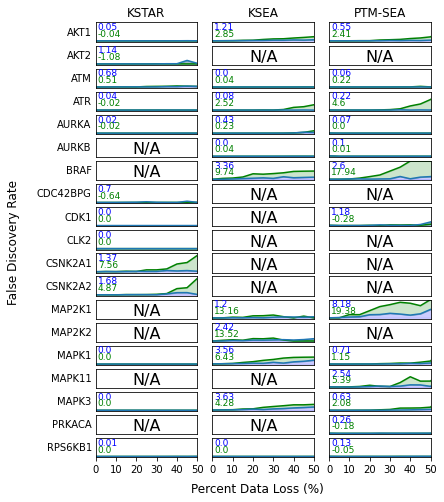

In [79]:
rdata['Kinase'] = rdata['Condition'].apply(lambda x: x.split(',')[1])
bdata['Kinase'] = bdata['Condition'].apply(lambda x: x.split(',')[1])
rand_sens = rdata.groupby(['Kinase', 'Algorithm']).mean().reset_index()
bias_sens = bdata.groupby(['Kinase','Algorithm']).mean().reset_index()
#Y
mod = 'ST'
tmp = res_all[res_all['Mod'] == mod].sort_values('Kinase')
tmp['condition'] = tmp['Study']+','+tmp['Kinase']
tmp['Fraction'] = (1-tmp['Fraction'])*100
num_cases = tmp['Kinase'].nunique()
#plot
fig, axes = plt.subplots(ncols = 3, nrows = num_cases, sharey = 'row', figsize = (6,8))
fig.subplots_adjust(wspace = 0.15)

cases = tmp['Kinase'].unique()
algorithms = ['KSTAR','KSEA',"PTM-SEA"]
for i in range(tmp['Kinase'].nunique()):
    kinase = cases[i]
    for j in range(len(algorithms)):
        tmp2 = tmp[tmp['Algorithm'] == algorithms[j]]
        #tmp2 = tmp2[tmp2['Study'] == study]
        tmp2 = tmp2[tmp2['Kinase'] == kinase]
        tmp2 = tmp2.drop(['Study', 'Kinase', 'Algorithm','Mod'], axis = 1)
        if tmp2.shape[0] > 0:
            mean = tmp2.groupby(['Fraction','Selection']).mean()
            mean = mean.reset_index()
            std = tmp2.groupby(['Fraction','Selection']).std()
            std = std.reset_index()
            bmean = mean[mean['Selection'] != 'random']
            bstd = std[std['Selection'] != 'random']
            rmean = mean[mean['Selection'] != 'Biased']
            rstd = std[std['Selection'] != 'Biased']
            axes[i,j].plot(bmean['Fraction'],bmean['value'], color = 'green', label = 'Biased')
            axes[i,j].plot(rmean['Fraction'],rmean['value'], label = 'Random')
            axes[i,j].fill_between(rmean['Fraction'], rmean['value'],rmean['value'].min(), color = 'blue', alpha = 0.2)
            #add annotations with sensitivity scores
            tmp3 = rand_sens[rand_sens['Algorithm'] == algorithms[j]]
            axes[i,j].annotate(round(tmp3.loc[tmp3['Kinase'] == kinase, 'Sensitivity'].values[0], 2), (0.98, 0.62), c = 'blue', fontsize = 9)
            #add annotations with sensitivity scores
            tmp4 = bias_sens[bias_sens['Algorithm'] == algorithms[j]]
            axes[i,j].annotate(round(tmp4.loc[tmp4['Kinase'] == kinase, 'Sensitivity'].values[0], 2), (0.98, 0.25), c = 'green', fontsize = 9)
            #axes[i,0].axhline(0.05, c = 'red', linestyle = 'dashed', alpha = 0.4)
            if bmean.dropna()['Fraction'].max() < 50:
                coverage_loss = bmean.dropna()
                x1 = coverage_loss['Fraction'].max()
                barea_under_curve = bmean.replace(np.nan, 1)
                new_row = {'Fraction':x1, 'Selection':'Biased','value':1}
                barea_under_curve = barea_under_curve.append(new_row, ignore_index = True).sort_values('value', ascending = False).sort_values('Fraction', ascending = False)
                rmean_extra = rmean.copy()
                new_row = {'Fraction':x1, 'Selection':'Biased','value':rmean.loc[rmean['Fraction'] == x1, 'value'].values[0]}
                rmean_extra = rmean_extra.append(new_row, ignore_index = True).sort_values('value', ascending = False).sort_values('Fraction', ascending = False)
                #add point where data is lost
                axes[i,j].plot(x1, coverage_loss.loc[coverage_loss['Fraction'] == coverage_loss['Fraction'].max(), 'value'], marker = 'o', c = 'k', markersize = 3)
                axes[i,j].plot([x1,x1], [coverage_loss.loc[coverage_loss['Fraction'] == x1, 'value'].values[0], 1], c = 'green', ls = 'dashed')
                axes[i,j].fill_between(barea_under_curve['Fraction'], barea_under_curve['value'],rmean_extra['value'], color = 'green', alpha = 0.2)
            else:
                axes[i,j].fill_between(bmean['Fraction'], bmean['value'],rmean['value'], color = 'green', alpha = 0.2)

        else:
            axes[i,j].annotate('N/A', (25, 0.4), ha = 'center', va = 'center', fontsize = 16)
        if algorithms[j] == 'KSTAR':
            axes[i,j].set_ylabel(kinase, rotation = 0, ha = 'right', va = 'center')
            
        axes[i,j].set_xlim([0,50])
        #axes[i,0].set_title('KSTAR')
        axes[i,j].set_ylim([-0.05,1])
        if i == 18:
            axes[i,j].set_xticks([0,10,20,30,40, 50])
            axes[i,j].set_yticks([])
        else:
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            

    
axes[0,0].set_title('KSTAR')
axes[0,1].set_title('KSEA')
axes[0,2].set_title('PTM-SEA')
#fig.supxlabel('Percent Data Loss')

fig.supxlabel('Percent Data Loss (%)', y = 0.06)
fig.supylabel('False Discovery Rate', x = -0.08)

##### Plot tolerable data loss

C:\Users\Sam\miniconda3\envs\kstar\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sam\miniconda3\envs\kstar\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sam\miniconda3\envs\kstar\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sam\miniconda3\envs\kstar\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sam\miniconda3\envs\kstar\lib\site-packages\seaborn\cat

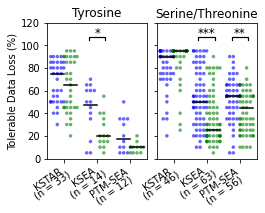

In [116]:
fig, ax = plt.subplots(figsize = (3.75,2.5), ncols = 2, sharey = 'row')
blues = sns.color_palette('Blues', n_colors = 10)
greens = sns.color_palette('Greens', n_colors = 10)
plt_data_Y = tdl_plt_data[tdl_plt_data['Mod'] == 'Y']
palette = {'Random': 'blue', 'Targeted': 'green'}
s1 = sns.swarmplot(x = 'Algorithm', y = 'Tolerable Data Loss (%)', hue = 'Selection', data = plt_data_Y, palette = palette, s= 3.5, dodge = True, alpha = 0.6, zorder = 0, ax = ax[0])
fig.subplots_adjust(wspace = 0.1)
ax[0].set_title('Tyrosine')
ax[0].set_xlabel('')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 35, ha = 'right')
ax[0].set_ylim([0, 120])
#add number of observations to xticklabels()
num_obs = plt_data_Y[plt_data_Y['Selection'] == 'Random'].groupby('Algorithm').count()['Tolerable Data Loss (%)']
num_obs.rename({'Tolerable Data Loss (%)':'Number of Tests'}, inplace = True)
ax[0].text(-0.35, -36, '(n = '+str(num_obs.loc['KSTAR'])+')',ha = 'center', rotation = 35)
ax[0].text(0.75, -35, '(n = '+str(num_obs.loc['KSEA'])+')',ha = 'center', rotation = 35)
ax[0].text(1.52, -40, '(n = '+str(num_obs.loc['PTM-SEA'])+')',ha = 'center', rotation = 35)
#add lines for medians (Y)
#KSTAR
ax[0].plot([-0.4,0],[75,75], c = 'k', linewidth =1.5)
ax[0].plot([0,0.4],[65,65], c = 'k', linewidth =1.5)
#KSEA
ax[0].plot([0.6,1],[47.5,47.5], c = 'k', linewidth =1.5)
ax[0].plot([1,1.4],[20,20], c = 'k', linewidth =1.5)
#PTM-SEA
ax[0].plot([1.6,2],[17.5,17.5], c = 'k', linewidth =1.5)
ax[0].plot([2,2.4],[10,10], c = 'k', linewidth =1.5)

#add lines for medians (ST)
#KSTAR
ax[1].plot([-0.4,0],[90,90], c = 'k', linewidth =1.5)
ax[1].plot([0,0.4],[95,95], c = 'k', linewidth =1.5)
#KSEA
ax[1].plot([0.6,1],[50,50], c = 'k', linewidth =1.5)
ax[1].plot([1,1.4],[25,25], c = 'k', linewidth =1.5)
#PTM-SEA
ax[1].plot([1.6,2],[55,55], c = 'k', linewidth =1.5)
ax[1].plot([2,2.4],[45,45], c = 'k', linewidth =1.5)


plt_data_ST = tdl_plt_data[tdl_plt_data['Mod'] == 'ST']
s2 = sns.swarmplot(x = 'Algorithm', y = 'Tolerable Data Loss (%)', hue = 'Selection',data = plt_data_ST, s = 3.5,palette = palette, alpha = 0.6, dodge = True,  ax = ax[1],zorder = 0)
ax[1].set_title('Serine/Threonine')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 35, ha = 'right')
ax[1].set_ylim([0, 120])
#add number of observations to xticklabels()
num_obs = plt_data_ST[plt_data_ST['Selection'] == 'Random'].groupby('Algorithm').count()['Tolerable Data Loss (%)']
num_obs.rename({'Tolerable Data Loss (%)':'Number of Tests'}, inplace = True)
ax[1].text(-0.35, -36, '(n = '+str(num_obs.loc['KSTAR'])+')',ha = 'center', rotation = 35)
ax[1].text(0.75, -35, '(n = '+str(num_obs.loc['KSEA'])+')',ha = 'center', rotation = 35)
ax[1].text(1.52, -40, '(n = '+str(num_obs.loc['PTM-SEA'])+')',ha = 'center', rotation = 35)
#add lines for medians
s1.legend().remove()
s2.legend().remove()


#add statistical tests (random vs. targeted attack)
start_heights = [[105, 105, 60], [105,105,105]]
selections = ['Random', 'Targeted']
algorithms = plt_data['Algorithm'].unique()
pds = [plt_data_Y,plt_data_ST]
adjustment = [0.1,0.2]
hs = [2, 2]
tick = [0,1,2]
stats_res = pd.DataFrame(index = algorithms, columns = ['Y','ST'])
mods = ['Y','ST']
for i in range(2):
    for j in range(len(algorithms)):
        plt_data2 = pds[i][pds[i]['Algorithm'] ==  algorithms[j]]
        #run statistical test
        group1 = plt_data2.loc[plt_data2['Selection'] == 'Random','Tolerable Data Loss (%)']
        group2 = plt_data2.loc[plt_data2['Selection'] == 'Targeted','Tolerable Data Loss (%)']
        f,p = stats.mannwhitneyu(group1,group2, alternative = 'greater')
        stats_res.loc[algorithms[j], mods[i]] = p
        # statistical annotation
        start_height = start_heights[i][j]
        h = hs[i]
        x1, x2 = tick[j] - 0.25, tick[j] + 0.25   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

        if p < 1e-4:
            annot = '***'
        elif p < 1e-3:
            annot = '**'
        elif p < 0.01:
            annot = '*'
        else:
            annot = None

        if start_height is None:
            y = random_data['Sensitivity'].max() + h
        else:
            y = start_height


        if annot is not None:
            ax[i].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
            ax[i].text((x1+x2)*.5, y-adjustment[i], annot, ha='center', va='bottom', color='k', fontsize = 12)

##### Plot sensitivity boxplots

Text(0.5, 0.98, 'Tyrosine')

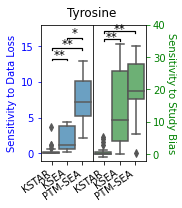

In [85]:
plt_data_Y = sensitivity[sensitivity['Mod'] == 'Y']
fig, ax = plt.subplots(ncols = 2, figsize = (1.88,2.5))
plt_data2 = plt_data_Y[plt_data_Y['Selection'] ==  'Random']
start_heights = [13, 14.5, 16]
color = sns.color_palette('Blues', n_colors = 10)
palette ={'KSTAR':color[5], 'KSEA':color[5], "PTM-SEA":color[5]}
sns.boxplot(x = 'Selection', y = 'Sensitivity', hue = 'Algorithm', data = plt_data2, palette = palette, ax = ax[0])
ax[0].get_legend().remove()
ax[0].tick_params(axis='y', which='both', colors='b')
ax[0].set_ylabel('Sensitivity to Data Loss', c = 'blue')
ax[0].set_xticks([-0.25,0,0.25])
ax[0].set_xticklabels(['KSTAR','KSEA','PTM-SEA'], rotation = 35, ha = 'right')
ax[0].set_xlabel('')
ax[0].set_ylim([-1,18])
ax[0].set_xlim([-0.43,0.43])
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

color = sns.color_palette('Greens', n_colors = 10)
palette ={'KSTAR':color[5], 'KSEA':color[5], "PTM-SEA":color[5]}
sns.boxplot(x = 'Selection', y = 'Sensitivity', hue = 'Algorithm', data = plt_data_Y[plt_data_Y['Selection'] ==  'Targeted'], palette = palette, ax = ax[1])
ax[1].set_ylabel('Sensitivity to Study Bias', rotation = 270, labelpad = 10, c = 'green')
ax[1].get_legend().remove()
ax[1].tick_params(axis='y', which='both', colors='g')
ax[1].set_xticks([-0.25,0,0.25])
ax[1].set_xticklabels(['KSTAR','KSEA','PTM-SEA'], rotation = 35, ha = 'right')
ax[1].set_xlabel('')
ax[1].set_ylim([-2, 40])
ax[1].set_xlim([-0.43,0.43])
fig.subplots_adjust(wspace = 0)

start_heights = [[13, 14.5, 16], [35,37.5,39]]
selections = ['Random', 'Targeted']
adjustment = [0.1,0.8]
hs = [0.2, 0.5]
stats_res = pd.DataFrame(index = ['KSTAR,KSEA','KSTAR,PTM-SEA','KSEA,PTM-SEA'], columns = selections)
for i in range(2):
    plt_data2 = plt_data_Y[plt_data_Y['Selection'] ==  selections[i]]
    #run statistical test
    group1 = plt_data2.loc[plt_data2['Algorithm'] == 'KSTAR','Sensitivity']
    group2 = plt_data2.loc[plt_data2['Algorithm'] == 'KSEA','Sensitivity']
    f,p = stats.mannwhitneyu(group1,group2)
    stats_res.loc['KSTAR,KSEA',selections[i]] = p
    # statistical annotation
    start_height = start_heights[i][0]
    h = hs[i]
    x1, x2 = -0.25, 0   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

    if p < 1e-10:
        annot = '***'
    elif p < 1e-5:
        annot = '**'
    elif p < 0.05:
        annot = '*'
    else:
        annot = None

    if start_height is None:
        y = random_data['Sensitivity'].max() + h
    else:
        y = start_height


    if annot is not None:
        ax[i].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        ax[i].text((x1+x2)*.5, y-adjustment[i], annot, ha='center', va='bottom', color='k', fontsize = 12)

    #run statistical test
    group1 = plt_data2.loc[plt_data2['Algorithm'] == 'KSEA','Sensitivity']
    group2 = plt_data2.loc[plt_data2['Algorithm'] == 'PTM-SEA','Sensitivity']
    f,p = stats.mannwhitneyu(group1,group2)
    stats_res.loc['KSEA,PTM-SEA',selections[i]] = p
    # statistical annotation
    start_height = start_heights[i][2]
    h = hs[i]
    x1, x2 = 0, 0.25   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

    if p < 1e-10:
        annot = '***'
    elif p < 1e-5:
        annot = '**'
    elif p < 0.05:
        annot = '*'
    else:
        annot = None

    if start_height is None:
        y = random_data['Sensitivity'].max() + h
    else:
        y = start_height


    if annot is not None:
        ax[i].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        ax[i].text((x1+x2)*.5, y-adjustment[i], annot, ha='center', va='bottom', color='k', fontsize = 12)

    #run statistical test
    group1 = plt_data2.loc[plt_data2['Algorithm'] == 'KSTAR','Sensitivity']
    group2 = plt_data2.loc[plt_data2['Algorithm'] == 'PTM-SEA','Sensitivity']
    f,p = stats.mannwhitneyu(group1,group2)
    stats_res.loc['KSTAR,PTM-SEA',selections[i]] = p
    # statistical annotation
    start_height = start_heights[i][1]
    h = hs[i]
    x1, x2 = -0.25, 0.25   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

    if p < 1e-10:
        annot = '***'
    elif p < 1e-5:
        annot = '**'
    elif p < 0.05:
        annot = '*'
    else:
        annot = None

    if start_height is None:
        y = random_data['Sensitivity'].max() + h
    else:
        y = start_height


    if annot is not None:
        ax[i].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        ax[i].text((x1+x2)*.5, y-adjustment[i], annot, ha='center', va='bottom', color='k', fontsize = 12)


        
fig.suptitle('Tyrosine')

Text(0.5, 0.98, 'Serine/Threonine')

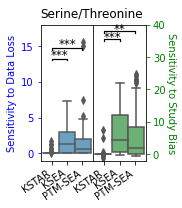

In [87]:
plt_data_ST = sensitivity[sensitivity['Mod'] == 'ST']
fig, ax = plt.subplots(ncols = 2, figsize = (1.88,2.5))
plt_data2 = plt_data_ST[plt_data_ST['Selection'] ==  'Random']
start_heights = [13, 14.5, 16]
color = sns.color_palette('Blues', n_colors = 10)
palette ={'KSTAR':color[5], 'KSEA':color[5], "PTM-SEA":color[5]}
sns.boxplot(x = 'Selection', y = 'Sensitivity', hue = 'Algorithm', data = plt_data2, palette = palette, ax = ax[0])
ax[0].get_legend().remove()
ax[0].tick_params(axis='y', which='both', colors='b')
ax[0].set_ylabel('Sensitivity to Data Loss', c = 'blue')
ax[0].set_xticks([-0.25,0,0.25])
ax[0].set_xticklabels(['KSTAR','KSEA','PTM-SEA'], rotation = 35, ha = 'right')
ax[0].set_xlabel('')
ax[0].set_ylim([-1,18])
ax[0].set_xlim([-0.43,0.43])
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

color = sns.color_palette('Greens', n_colors = 10)
palette ={'KSTAR':color[5], 'KSEA':color[5], "PTM-SEA":color[5]}
sns.boxplot(x = 'Selection', y = 'Sensitivity', hue = 'Algorithm', data = plt_data_ST[plt_data_ST['Selection'] ==  'Targeted'], palette = palette, ax = ax[1])
ax[1].set_ylabel('Sensitivity to Study Bias', rotation = 270, labelpad = 10, c = 'green')
ax[1].get_legend().remove()
ax[1].tick_params(axis='y', which='both', colors='g')
ax[1].set_xticks([-0.25,0,0.25])
ax[1].set_xticklabels(['KSTAR','KSEA','PTM-SEA'], rotation = 35, ha = 'right')
ax[1].set_xlabel('')
ax[1].set_ylim([-2, 40])
ax[1].set_xlim([-0.43,0.43])
fig.subplots_adjust(wspace = 0)

start_heights = [[13, 14.5, 16], [35,37.5,39]]
selections = ['Random', 'Targeted']
adjustment = [0.1,0.8]
hs = [0.2, 0.5]
stats_res = pd.DataFrame(index = ['KSTAR,KSEA','KSTAR,PTM-SEA','KSEA,PTM-SEA'], columns = selections)
for i in range(2):
    plt_data2 = plt_data_ST[plt_data_ST['Selection'] ==  selections[i]]
    #run statistical test
    group1 = plt_data2.loc[plt_data2['Algorithm'] == 'KSTAR','Sensitivity']
    group2 = plt_data2.loc[plt_data2['Algorithm'] == 'KSEA','Sensitivity']
    f,p = stats.mannwhitneyu(group1,group2)
    stats_res.loc['KSTAR,KSEA',selections[i]] = p
    # statistical annotation
    start_height = start_heights[i][0]
    h = hs[i]
    x1, x2 = -0.25, 0   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

    if p < 1e-10:
        annot = '***'
    elif p < 1e-5:
        annot = '**'
    elif p < 0.05:
        annot = '*'
    else:
        annot = None

    if start_height is None:
        y = random_data['Sensitivity'].max() + h
    else:
        y = start_height


    if annot is not None:
        ax[i].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        ax[i].text((x1+x2)*.5, y-adjustment[i], annot, ha='center', va='bottom', color='k', fontsize = 12)

    #run statistical test
    group1 = plt_data2.loc[plt_data2['Algorithm'] == 'KSEA','Sensitivity']
    group2 = plt_data2.loc[plt_data2['Algorithm'] == 'PTM-SEA','Sensitivity']
    f,p = stats.mannwhitneyu(group1,group2)
    stats_res.loc['KSEA,PTM-SEA',selections[i]] = p
    # statistical annotation
    start_height = start_heights[i][2]
    h = hs[i]
    x1, x2 = 0, 0.25   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

    if p < 1e-10:
        annot = '***'
    elif p < 1e-5:
        annot = '**'
    elif p < 0.05:
        annot = '*'
    else:
        annot = None

    if start_height is None:
        y = random_data['Sensitivity'].max() + h
    else:
        y = start_height


    if annot is not None:
        ax[i].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        ax[i].text((x1+x2)*.5, y-adjustment[i], annot, ha='center', va='bottom', color='k', fontsize = 12)

    #run statistical test
    group1 = plt_data2.loc[plt_data2['Algorithm'] == 'KSTAR','Sensitivity']
    group2 = plt_data2.loc[plt_data2['Algorithm'] == 'PTM-SEA','Sensitivity']
    f,p = stats.mannwhitneyu(group1,group2)
    stats_res.loc['KSTAR,PTM-SEA',selections[i]] = p
    # statistical annotation
    start_height = start_heights[i][1]
    h = hs[i]
    x1, x2 = -0.25, 0.25   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())

    if p < 1e-10:
        annot = '***'
    elif p < 1e-5:
        annot = '**'
    elif p < 0.05:
        annot = '*'
    else:
        annot = None

    if start_height is None:
        y = random_data['Sensitivity'].max() + h
    else:
        y = start_height


    if annot is not None:
        ax[i].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
        ax[i].text((x1+x2)*.5, y-adjustment[i], annot, ha='center', va='bottom', color='k', fontsize = 12)


        
fig.suptitle('Serine/Threonine')

Heatmap for individual kinases:

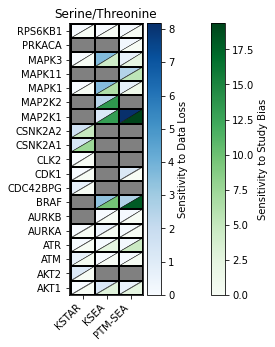

In [88]:
from matplotlib.patches import Rectangle
#construct dataframe for plotting
selection = 'random'
mod = 'ST'
plt_data = None
if selection == 'random':
    for alg in random_score[mod].keys():
        if plt_data is None:
            plt_data = pd.DataFrame({'Sensitivity to Data Loss':random_score[mod][alg], 'Algorithm':alg, 'Condition': conditions[mod][alg], 'Kinase': kinases[mod][alg]})
        else:
            plt_data = pd.concat([plt_data, pd.DataFrame({'Sensitivity to Data Loss':random_score[mod][alg],'Algorithm':alg, 'Condition': conditions[mod][alg], 'Kinase': kinases[mod][alg]})])
            
mat1 =plt_data.groupby(['Algorithm','Kinase']).mean().reset_index().sort_values(by = 'Sensitivity to Data Loss', ascending = False).pivot(index = 'Kinase', columns = "Algorithm")
mat1 = mat1.T.reset_index().drop(['level_0'], axis =1)
mat1.index = mat1['Algorithm']
mat1.drop('Algorithm', axis = 1, inplace = True)
mat1 = mat1.T[['KSTAR','KSEA','PTM-SEA']]

plt_data = None
selection = 'biased'
if selection == 'biased':
    for alg in diff_score[mod].keys():
        if plt_data is None:
            plt_data = pd.DataFrame({'Sensitivity to Study Bias':diff_score[mod][alg], 'Algorithm':alg, 'Condition': conditions[mod][alg],  'Kinase': kinases[mod][alg]})
        else:
            plt_data = pd.concat([plt_data, pd.DataFrame({'Sensitivity to Study Bias':diff_score[mod][alg],'Algorithm':alg, 'Condition': conditions[mod][alg], 'Kinase': kinases[mod][alg]})])
mat2 = plt_data.groupby(['Algorithm','Kinase']).mean().reset_index().sort_values(by = 'Sensitivity to Study Bias', ascending = False).pivot(index = 'Kinase', columns = 'Algorithm')
mat2 = mat2.T.reset_index().drop(['level_0'], axis =1)
mat2.index = mat2['Algorithm']
mat2.drop('Algorithm', axis = 1, inplace = True)
mat2 = mat2.T[['KSTAR','KSEA','PTM-SEA']]


mat3 = mat1.replace(np.nan, 1)
mat3[mat3 != 1] = np.nan


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
fig, ax = plt.subplots(figsize = (3,5))
M = 3
N = mat1.shape[0]
x = np.arange(M + 1)
y = np.arange(N + 1)
xs, ys = np.meshgrid(x, y)
xs2,ys2 = np.meshgrid(np.arange(3,M+1), y)

triangles1 = [(i + j*(M+1), i+1 + (j+1)*(M+1), i + (j+1)*(M+1)) for j in range(N) for i in range(M)]
triangles2 = [(i + j*(M+1),i+1 + j*(M+1), i+1 + (j+1)*(M+1)) for j in range(N) for i in range(M)]
triangles3 = triangles1 + triangles2
triang1 = Triangulation(xs.ravel(), ys.ravel(), triangles1)
triang2 = Triangulation(xs.ravel(), ys.ravel(), triangles2)
triang3 = Triangulation(xs.ravel(), ys.ravel(), triangles3)

img1 = ax.tripcolor(triang1, mat1.values.ravel(), cmap=plt.get_cmap('Blues'), vmin = 0, edgecolor = 'black', linewidths = 0.45)
img2 = ax.tripcolor(triang2, mat2.values.ravel(), cmap=plt.get_cmap('Greens'), vmin = 0, edgecolor = 'black', lw = 0.45)


plt.colorbar(img2, pad= 0.3, label = 'Sensitivity to Study Bias')
plt.colorbar(img1, pad = 0.05, label = 'Sensitivity to Data Loss')

ax.set_xlim(x[0]-0.06, x[-1])
ax.set_ylim(y[0], y[-1]+0.06)
ax.set_xticks([0.5,1.5,2.5],['KSTAR','KSEA','PTM-SEA'], rotation=90)
ax.set_yticks(np.linspace(0.5,mat1.shape[0]-0.5,mat1.shape[0]), mat1.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
add_offcenter_grid(y = [0, mat1.shape[0]], x = [0,mat1.shape[1]])
plt.title('Serine/Threonine')
#add null boxes
for i in range(mat3.shape[0]):
    for j in range(mat3.shape[1]):
        if mat3.iloc[i,j] == 1:
            ax.add_patch(Rectangle((j,i),1,1, facecolor = 'gray', fill = True))
plt.show()